# Техническое задание по проекту: Построение ML-продукта для выявления и оптимизации платежей преподавателей сервиса Repetit.ru

Сервис передает контакты клиента (ученика) репетитору. Если репетитор начинает заниматься с учеником, то он должен платить сервису комиссию от каждого занятия. 

Но в реальности так происходит не всегда. Иногда, это из-за того, что репетитор звонит по телефону и ему просто не отвечают.  
Некоторые репетиторы плохо договариваются о занятиях или обманывают. Сервис теряет деньги каждый раз, когда отдаёт заявку неэффективному репетитору. 

Заказчику нужно как можно раньше понять, что репетитор недобросовестный или мошенник, чтобы отключить его от сервиса и отдавать заявки ответственным репетиторам.



#### Задачи:
Разработать модель, которая по имеющейся информации о репетиторе и проведенных им занятий будет классифицировать репетиторов на платящих и неэффективных. Оценка качества модели будет производиться с использованием метрики F1.


#### Признаки обмана, выявленные при ручной проверке:
* Заказчик произвел ручную проверку репетиторов на предмет мошенничества (звонки клиентам и так далее). Выяснилось, что 20% обманывают нас так или иначе.
* Несоответствие цены в заявке, в анкете репетитора и реальной
* 1 занятие на ученика (соотношение к общему кол-ву занятий)
* Разная стоимость с разными учениками
* Разная стоимость уроков с одним учеником
* Стоят занятия в расписании, а оплат нет
* Когда у репетитора по разным ученикам оплаты рядом по времени, то он сам оплачивает
* Как часто заходит в приложение - если редко, то сам оплачивает
* Статус заявки договорились о занятиях, оплат нет более недели (и не перенесено)
* status в orders = 9
* lessons с amount_payed > 0 за последнюю неделю
* Ученик не отмечен как завершенный, а оплат нет 
* В качестве примера, есть SQL запрос позволяющий получить данную информацию
* Репетитор отчитался, что провёл платное занятие, оплаты нет 
* В качестве примера, есть SQL запрос позволяющий получить данную информацию
* Цена ниже 500 р. в регионах, ниже 700 в мск


## Описание данных
#### Информация о репетиторах (teacher_info.feather)
* id - айди репетитора  
* reg_date - дата регистрации 
* birth_date - дата рождения
* teaching_start_date - дата начала первого занятия
* is_email_confirmed - подтвержден ли e-mail адресс
* lesson_duration - продолжит урока
* lesson_cost - стоимость урока
* is_display - показывается в каталоге
* last_visited - последний визит
* is_pupils_needed - открыт для заявок
* is_cell_phone_confirmed - подтвержден ли номер телефона
* area_id - регион 
* sex - пол 
* orders_allowed - разрешено назначать на заявки
* review_num - отзывы
#### Статистика по репетиторам и таргет (teachers.feather)
* id - айди репетитора 
* lessons_delivered - поставлено уроков
* mean_lesson_price - средняя стоимость уроков
* lessons_given - оплачено уроков
* lessons_started_fraction - процент начала занятий
* lessons_per_pupil - занятий на ученика
* money_recieved - получено денег
* blocked - целевой признак (active/blocked)
#### Ученики (lesson_course.feather)
* Id - айди
* client_id - айди ученика
* teacher_id - айди репетитора
* order_id - айди заявки
* lesson_place - занятия онлайн или офлайн
* lesson_price - цена
* is_active - идут ли занятия, на паузе, завершены
* lesson_duration - продолжительность урока
* date_updated
* suspend_till_date
#### Занятия (lessons.feather)
* Id - айди
* lesson_course_id - айди ученика
* lesson_date - дата
* time_from - время от 
* time_to - время до
* home_task - дз
* is_regular - автоматически повторяющееся занятие
* amount_to_pay - стоимость
* amount_paid - оплачено
#### Цены на занятия репетиторов (teacher_prices.feather)
* date_update - дата обновления цен
* teacher_id - айди репетитора
* subject_id - айди предмета
* price - цена занятий у себя
* price_external - цена занятий на выезде
* price_remote - цена онлайн занятий
#### Заявки (orders.feather)
* order_date - дата создания 
* subject_id - предмет
* purpose - цель занятий
* lesson_price - цена
* lesson_duration - желаемая продолжительность урока
* home_metro_id - ближайшее метро
* add_info - доп инфо
* start_date
* working_teacher_id
* status_id - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)
* comments   
* amount_to_pay
* planned_lesson_number - клиент планирует N занятий
* first_lesson_date - дата 1 занятия
* creator_id - кто создал заявку (id сотрудника или клиента)
* pupil_category_new_id - возраст ученика
* lessons_per_week - занятий а неделю
* minimal_price
* teacher_sex - пол репетитора
* teacher_experience_from - опыт репетитора от
* teacher_experience_to- опыт репетитора до
* lesson_place_new - онлайн, у ученика, у учителя
* pupil_knowledgelvl - уровень знаний ученика
* teacher_age_from - желаемый возраст репеитора от
* teacher_age_to - желаемый возраст репеитора от
* chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
* no_teachers_available - на заявку нет подходящих репов
* source_id - где создана заявка (какая часть сайта, не регион)
* original_order_id - дублем какой заявки является эта заявка
* client_id - айди клиента
* additional_status_id
* max_metro_distance - максимально готов ехать от метро
* estimated_fee 
* payment_date
* test_group - аб тесты
* is_display_to_teachers - хочет ли клиент получать отклики репетиторов

# Библиотеки, параметры, загрузка данных

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import pyarrow.feather as feather
import seaborn as sns
from tqdm import tqdm

from catboost import CatBoostClassifier, Pool, cv

import optuna
from optuna.samplers import TPESampler

from category_encoders import MEstimateEncoder

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTENC, SMOTE


# Parameters
RS = 33564 # Random Seed

sampler = TPESampler(seed=RS)
optuna.logging.set_verbosity(optuna.logging.WARNING)

plt.rcParams["figure.figsize"] = (15, 10)

pd.set_option('display.max_columns', 50)
pd.set_option('mode.chained_assignment', None)
pd.options.display.max_colwidth = 100

In [3]:
# Загрузим предоставленные данные

lesson_course = feather.read_feather('Data\\datasets\\lesson_course.feather')
lessons = feather.read_feather('Data\\datasets\\\lessons.feather')
orders = feather.read_feather('Data\\datasets\\orders.feather')
teacher_prices = feather.read_feather('Data\\datasets\\teacher_prices.feather')
teachers_info = feather.read_feather('Data\\datasets\\teachers_info.feather')
teachers = feather.read_feather('Data\\datasets\\teachers.feather')

# Ознакомление и анализ данных

In [4]:
# функция для ознакомления с данными

def first_look(data):
    display(data.info())
    print('='*30)
    display(data.describe())
    print('='*30)
    print('Дубликатов обнаружено: ', data.duplicated().sum())
    print('='*30)
    try:
        data.hist(figsize=(12, 10), bins=25)
        plt.show()
    except:
        print('Нет данных для построения гистограмм!')
    print('='*30)
    print('Размер датасета:', data.shape)
    print('='*30)
    print('Пропуски')
    print(data.isna().sum())
    display(data.sample(10))

## Таблица `teachers`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1656 non-null   int64  
 1   lessons_delivered         1656 non-null   float64
 2   mean_lesson_price         1656 non-null   float64
 3   lessons_given             1656 non-null   float64
 4   lessons_started_fraction  1656 non-null   float64
 5   lessons_per_pupil         1656 non-null   float64
 6   money_recieved            1656 non-null   float64
 7   blocked                   1656 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 103.6 KB


None

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1.656000e+03,1656.000000
mean,195700.558575,177.651570,1509.636125,104.064614,0.194887,9.872112,1.750237e+05,0.336353
std,87667.530193,336.451272,908.722960,217.635955,0.135023,9.601426,4.850086e+05,0.472604
min,458.000000,1.000000,200.000000,1.000000,0.009901,1.000000,2.000000e+02,0.000000
25%,130185.500000,12.000000,994.880952,8.000000,0.105263,3.000000,9.000000e+03,0.000000
50%,210036.500000,54.000000,1350.308642,30.000000,0.166667,7.094017,4.310000e+04,0.000000
75%,276014.500000,207.500000,1852.012502,103.000000,0.250000,13.500000,1.483500e+05,1.000000
max,317531.000000,5690.000000,15000.000000,3788.000000,1.000000,78.166667,1.116220e+07,1.000000


Дубликатов обнаружено:  0


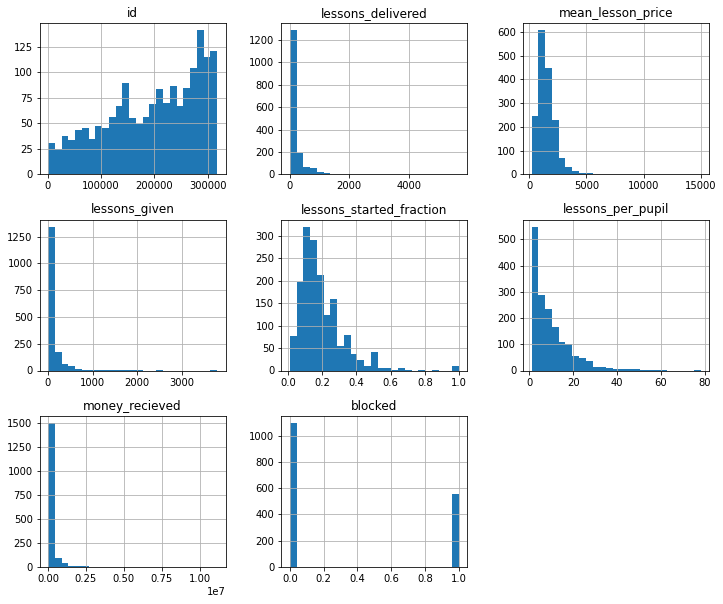

Размер датасета: (1656, 8)
Пропуски
id                          0
lessons_delivered           0
mean_lesson_price           0
lessons_given               0
lessons_started_fraction    0
lessons_per_pupil           0
money_recieved              0
blocked                     0
dtype: int64


,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
1116,203805,5.0,1200.000000,4.0,0.083333,4.000000,4800.0,1
660,210893,9.0,3000.000000,9.0,0.041667,9.000000,27000.0,1
792,308191,16.0,933.333333,15.0,0.125000,7.500000,14000.0,0
99,188654,665.0,2119.537815,476.0,0.250000,26.444444,1008900.0,0
560,101749,33.0,775.000000,32.0,0.130435,10.666667,24800.0,0
1134,293201,28.0,312.500000,16.0,0.800000,4.000000,5000.0,0
190,226224,108.0,1033.980583,103.0,0.227273,20.600000,106500.0,0
1277,252276,17.0,1000.000000,17.0,0.206897,2.833333,17000.0,0
1299,144679,5.0,4040.000000,5.0,0.181818,2.500000,20200.0,0
144,40731,255.0,1130.708661,254.0,0.220000,23.090909,287200.0,0


In [5]:
first_look(teachers)

Итого:
* 1656 строк;
* пропусков нет;
* есть подозрительные значения в данных (например 15000 за урок);
* в целевой переменной есть дисбаланс классов.

Сменим тип данных на `int` в столбцах `lessons_delivered`, `lessons_given` и `money_recieved`

In [6]:
teachers[['lessons_delivered', 'lessons_given', 'money_recieved']] = teachers[['lessons_delivered', 'lessons_given', 'money_recieved']].astype('int')

In [7]:
teachers[teachers['mean_lesson_price'] > 5000].sort_values(by='mean_lesson_price', ascending=True)

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
913,45382,32,5050.000000,30,0.192308,6.000000,151500,0
914,282114,6,5066.666667,6,0.111111,6.000000,30400,0
1267,212159,70,5468.627451,51,0.118881,3.000000,278900,1
1032,71014,110,6150.000000,10,0.200000,5.000000,61500,0
653,125489,215,6627.272727,55,0.461538,9.166667,364500,0
1278,207140,265,8195.588235,34,0.093023,2.833333,278650,1
742,114012,55,14625.000000,8,0.030303,8.000000,117000,1
1585,214077,2,15000.000000,1,0.041667,1.000000,15000,1


In [8]:
teachers[teachers['lessons_delivered'] > 2000].sort_values(by='mean_lesson_price', ascending=True)

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
219,301671,2582,404.270833,480,0.290698,19.200000,194050,0
214,143227,2150,630.967742,775,0.588235,19.375000,489000,0
229,148227,2474,1100.040683,1229,0.241636,18.907692,1351950,0
26,232748,2505,1877.213740,1310,0.449275,42.258065,2459150,0
17,145938,2030,1997.892074,1186,0.352113,47.440000,2369500,0
186,108634,2729,2234.973532,2078,0.507614,20.780000,4644275,0
74,9245,3012,2243.610447,2508,0.500000,28.179775,5626975,0
248,139229,5690,2946.726505,3788,0.396584,18.124402,11162200,0
9,128014,2185,3531.250000,1520,0.666667,54.285714,5367500,0


Немного посмотрим распределения данных.

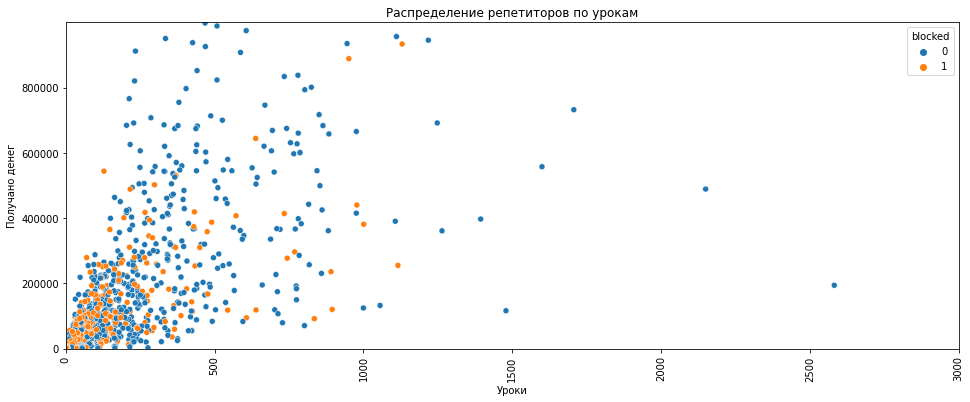

In [335]:
plt.figure(figsize=(16, 6))

sns.scatterplot(data=teachers, x='lessons_delivered', y='money_recieved', hue='blocked')

plt.title('Распределение репетиторов по урокам')
plt.ylabel('Получено денег')
plt.xlabel('Уроки')
plt.xlim([0, 3000])
plt.ylim([0, 999999])
plt.xticks(rotation= 90)

plt.show()

Видим, что чаще мошенничают репетиторы с небольшим количеством уроков и невысоким количеством полученных денег.

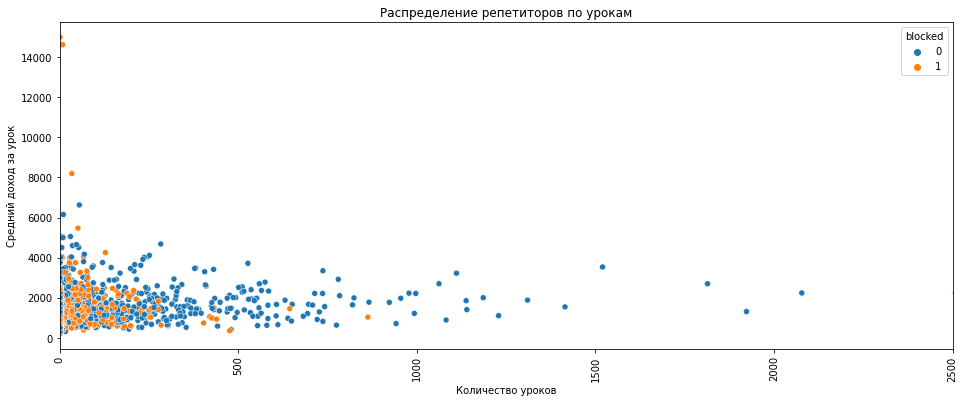

In [336]:
plt.figure(figsize=(16, 6))

sns.scatterplot(data=teachers, x='lessons_given', y=teachers.money_recieved / teachers.lessons_given, hue='blocked')

plt.title('Распределение репетиторов по урокам')
plt.ylabel('Средний доход за урок')
plt.xlabel('Количество уроков')
plt.xlim([0, 2500])
# plt.ylim([0, 1000000])
plt.xticks(rotation= 90)

plt.show()

Аналогично видно, что мошенники даю меншьше уроков, чем честные репетиторы. 

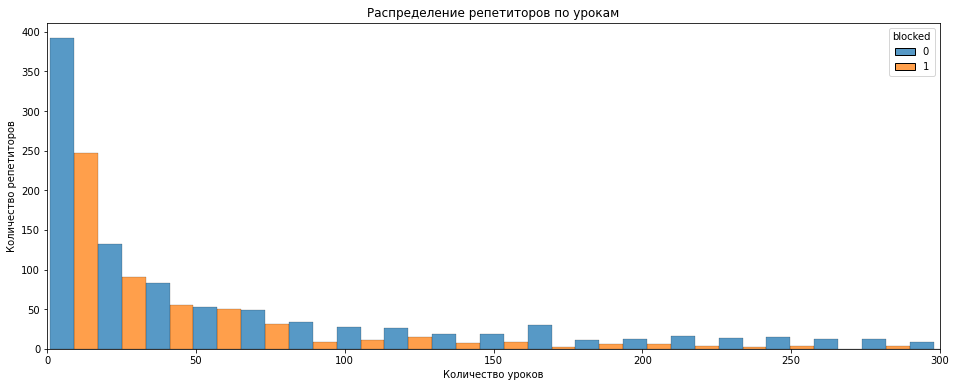

In [347]:
plt.figure(figsize=(16, 6))

sns.histplot(data=teachers, x='lessons_given', hue='blocked', multiple='dodge')

plt.title('Распределение репетиторов по урокам')
plt.ylabel('Количество репетиторов')
plt.xlabel('Количество уроков')
plt.xlim([0, 300])

plt.show()

## Таблица `teachers_info`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       307972 non-null  int64  
 1   reg_date                 307972 non-null  object 
 2   birth_date               307972 non-null  object 
 3   teaching_start_date      307972 non-null  object 
 4   is_email_confirmed       307972 non-null  int64  
 5   lesson_duration          307972 non-null  int64  
 6   lesson_cost              307972 non-null  int64  
 7   is_display               307972 non-null  int64  
 8   last_visited             235837 non-null  object 
 9   is_pupils_needed         11208 non-null   float64
 10  is_cell_phone_confirmed  307972 non-null  int64  
 11  area_id                  307972 non-null  int64  
 12  sex                      307972 non-null  int64  
 13  orders_allowed           307972 non-null  int64  
 14  revi

None

,id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
count,307972.000000,307972.000000,307972.000000,3.079720e+05,307972.000000,11208.000000,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000
mean,157246.177036,0.012732,61.502978,5.325806e+02,0.658735,0.948162,0.006910,8.488928,1.776892,0.860702,1.087859
std,90198.005463,0.112114,15.061675,2.146357e+03,0.474135,0.221710,0.082837,16.442877,0.467861,0.346258,4.863274
min,33.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79390.750000,0.000000,60.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,157384.500000,0.000000,60.000000,5.000000e+02,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
75%,235434.250000,0.000000,60.000000,9.000000e+02,1.000000,1.000000,0.000000,6.000000,2.000000,1.000000,0.000000
max,312622.000000,1.000000,999.000000,1.021709e+06,1.000000,1.000000,1.000000,121.000000,3.000000,1.000000,381.000000


Дубликатов обнаружено:  0


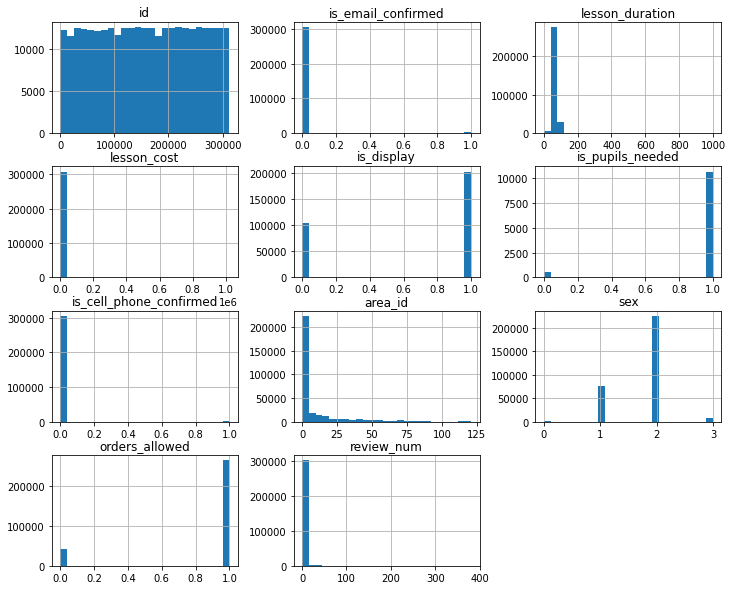

Размер датасета: (307972, 15)
Пропуски
id                              0
reg_date                        0
birth_date                      0
teaching_start_date             0
is_email_confirmed              0
lesson_duration                 0
lesson_cost                     0
is_display                      0
last_visited                72135
is_pupils_needed           296764
is_cell_phone_confirmed         0
area_id                         0
sex                             0
orders_allowed                  0
review_num                      0
dtype: int64


,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
236512,241126,2021-09-05 15:27:21.420,2001-07-25 00:00:00.000,2019-09-01 00:00:00.000,0,60,0,0,2021-09-05 15:27:21.953,NaN,0,4,2,0,0
230079,234527,2021-07-03 11:40:34.847,1984-10-24 00:00:00.000,2018-09-01 00:00:00.000,0,60,0,1,2021-07-05 07:47:59.027,NaN,0,2,2,1,0
151235,154634,2018-10-28 20:32:34.760,1970-07-16 00:00:00.000,1994-09-01 00:00:00.000,0,60,0,0,2018-10-28 20:32:35.890,NaN,0,1,2,1,0
122844,126235,2017-08-30 18:36:53.000,1993-03-30 00:00:00.000,2014-09-01 00:00:00.000,0,60,1500,1,2021-03-17 22:11:09.197,NaN,0,1,2,1,0
130631,134022,2017-11-11 21:25:14.000,1997-09-30 00:00:00.000,2017-09-01 00:00:00.000,0,60,600,1,2021-05-22 07:30:41.383,NaN,0,2,2,1,2
219409,223829,2021-01-25 01:36:02.820,1994-10-06 00:00:00.000,2015-09-01 00:00:00.000,0,40,0,0,2021-12-28 00:12:02.920,NaN,0,4,2,1,0
75032,77163,2014-11-10 21:11:59.000,1995-11-28 00:00:00.000,2013-09-01 00:00:00.000,0,60,500,0,2014-12-10 20:10:53.000,NaN,0,6,2,1,0
129743,133134,2017-11-01 14:33:57.000,1990-08-05 00:00:00.000,2014-09-01 00:00:00.000,0,60,1200,1,2022-03-13 18:13:25.843,NaN,0,1,2,1,1
253792,258406,2022-04-03 10:28:33.833,1976-01-25 00:00:00.000,2016-09-01 00:00:00.000,0,60,1000,1,2022-04-30 21:58:38.857,NaN,0,1,2,1,0
36275,37587,2012-03-14 00:20:48.000,1992-02-26 00:00:00.000,2011-01-01 00:00:00.000,0,60,800,0,2012-03-17 01:16:38.000,NaN,0,1,1,1,0


In [9]:
first_look(teachers_info)

Итого почти 308 тыс. строк, пропуски по колонкам обозначения времени последнего визита и нужны ли ученики.  
Также в колоках с датами излишняя информация со временем.

In [10]:
# Поработаем с датами

teachers_info['reg_date'] = pd.to_datetime(teachers_info['reg_date'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')
teachers_info['birth_date'] = pd.to_datetime(teachers_info['birth_date'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')
teachers_info['teaching_start_date'] = pd.to_datetime(teachers_info['teaching_start_date'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')
teachers_info['last_visited'] = pd.to_datetime(teachers_info['last_visited'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')



Посмотрим на данные в колонке последнего визита.


In [11]:
teachers_info[teachers_info['reg_date'] > teachers_info['last_visited']]


print('Первая регистрация, дата:   ', min(teachers_info['reg_date']))
print('Последняя регистрация, дата:', max(teachers_info['reg_date']))
print('Первый визит, дата:   ', min(teachers_info['last_visited']))
print('Последний визит, дата:   ', max(teachers_info['last_visited']))

#teachers_info.query('last_visited.isna() and id.isin(@teachers["id"])').describe()#.merge(teachers, on='id', how='left')
#teachers_info.query('(is_email_confirmed == 0) and (is_cell_phone_confirmed == 0) and (review_num == 0)  and @teachers["id"].isin(id)')

Первая регистрация, дата:    2007-12-25 00:00:00
Последняя регистрация, дата: 2023-11-08 00:00:00
Первый визит, дата:    2008-02-28 00:00:00
Последний визит, дата:    2022-10-25 00:00:00


In [12]:
#teachers_info.loc[teachers_info['last_visited'].isna(), 'last_visited'] = teachers_info['reg_date']



Пропуски в колонке о поиске учеников - нулями (вероятнее всего, что если репетитор не отметил открытость для заявок, то он не ищет учеников).

In [13]:
teachers_info['is_pupils_needed'].fillna(0, inplace=True)
teachers_info['is_pupils_needed'] = teachers_info['is_pupils_needed'].astype('int')

In [14]:
teachers_info.sample(20)

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
196897,201306,2020-05-25,1995-11-28,2014-09-01,0,60,0,0,2020-10-08,0,0,31,2,1,0
127841,131232,2017-10-11,1990-05-16,2016-09-01,0,60,600,1,2020-07-05,0,0,1,1,1,1
209503,213923,2020-10-04,2001-11-30,2019-09-01,0,60,0,0,2020-10-04,0,0,1,2,1,0
168044,171444,2019-07-27,1973-05-08,1998-09-01,0,30,1000,1,2022-10-23,0,0,1,2,0,11
266593,271218,2022-09-07,2003-11-18,2022-09-01,0,60,0,1,2022-09-07,0,0,5,2,0,0
263439,268059,2022-08-16,1999-04-02,2017-09-01,0,60,0,1,2022-09-20,0,0,41,2,0,0
64115,65969,2014-05-19,1988-06-02,2007-09-01,1,60,1500,1,2016-03-15,0,0,1,2,1,2
17579,18675,2010-10-11,1987-12-05,2005-09-01,0,60,900,1,2021-04-29,0,0,1,2,1,2
240063,244677,2021-10-04,2002-09-20,2018-09-01,0,120,1000,1,2022-06-02,0,0,2,2,1,0
259567,264187,2022-07-04,1983-08-21,2002-09-01,0,45,0,1,2022-07-05,0,0,1,2,1,0


Подозрительные данные в колонке с полом. Взглянем детальнее

In [15]:
teachers_info['sex'].value_counts()

2    225871
1     75085
3      6802
0       214
Name: sex, dtype: int64

Пол "0" добавим к полу "3".

In [16]:
teachers_info.loc[teachers_info['sex'] == 0, 'sex'] = 3
teachers_info['sex'].value_counts()

2    225871
1     75085
3      7016
Name: sex, dtype: int64

7000 неадекватно размеченных значений. Запомним на будущее

Аналогично взглянем на время уроков.

In [17]:
teachers_info['lesson_duration'].unique()

array([ 60,  45,  90, 120,  80,  30, 180,  50, 135,  40, 100,  55, 150,
       105, 240,  75, 130,  34,  67,  66,   1,   4,   7,  70, 210,  25,
       600, 140,  21, 190, 213, 123,  35,  96, 500,  10, 102,  20, 609,
       575, 200, 132, 400,  23, 115,  85,   3, 900, 990,  33,  77, 234,
       777, 460,   5, 700,   6,  44, 360,  18, 456, 300, 678,  65,  12,
       324, 435, 250, 601, 111,  68,   2, 901, 345, 110,  76,  95, 454,
       999, 228, 160, 242, 422,  42,  88, 125, 908, 145, 534, 535, 800,
         9, 622, 608, 323,  78,  69,  15,  24,  48,  62], dtype=int64)

In [18]:
teachers_info['lesson_duration'].value_counts(ascending=False).head(20)

60     245290
45      25738
90      25379
40       2870
120      2615
30       2598
50       1629
80        538
55        341
180       182
75        116
70         97
100        92
1          85
35         76
135        38
150        27
130        25
240        17
600        16
Name: lesson_duration, dtype: int64

Тоже видим неадекватные местами данные (1-7 или 900+ минут на урок).  
Малые значения (1-4), возможно, указаны в часах, но 4+ - уже непонятно  
Тоже запомним

Посмотрим, за какой временной интервал мы имеем сведения.

In [19]:
print('Первая регистрация, дата:', min(teachers_info['reg_date']))
print('Последний визит, дата:   ', max(teachers_info['last_visited']))
print('Временной интервал, дней:', max(teachers_info['last_visited']) - min(teachers_info['reg_date']))

Первая регистрация, дата: 2007-12-25 00:00:00
Последний визит, дата:    2022-10-25 00:00:00
Временной интервал, дней: 5418 days 00:00:00


Проверим возраст.

In [20]:
teachers_info['age'] = (max(teachers_info['last_visited'].dt.year) - teachers_info['birth_date'].dt.year)

teachers_info.query('age < 16 and age < 75')

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age
78073,80474,2015-01-16,2015-01-15,2014-09-01,0,60,0,0,NaT,0,0,1,3,1,0,7.0
78347,80748,2015-01-20,2015-01-19,2014-09-01,0,60,0,0,NaT,0,0,1,3,1,0,7.0
78348,80749,2015-01-20,2015-01-19,2014-09-01,0,60,0,0,NaT,0,0,2,3,1,0,7.0
80409,82813,2015-02-20,2015-02-19,2014-09-01,0,60,0,0,NaT,0,0,1,3,1,0,7.0
81030,83434,2015-03-03,2015-03-02,2014-09-01,0,60,0,0,NaT,0,0,63,3,1,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132372,135767,2017-12-14,2017-12-01,2015-09-01,0,60,0,0,2017-12-14,0,0,3,2,1,0,5.0
132384,135779,2017-12-14,2017-12-05,2012-09-01,0,60,0,0,2017-12-14,0,0,1,2,1,0,5.0
289547,294179,2023-05-23,2007-12-30,2021-09-01,0,60,500,1,NaT,0,0,4,2,1,0,15.0
293656,298289,2023-07-10,2007-05-03,2022-09-01,0,60,0,1,NaT,0,0,27,2,1,0,15.0


In [21]:
teachers_info['age'].unique()

array([ 39.,  42.,  57.,  34.,  37.,  50.,  33.,  26.,  65.,  44.,  71.,
        58.,  52.,  35.,  70.,  36.,  66.,  40.,  59.,  80.,  47.,  38.,
        32.,  48.,  49.,  78.,  76.,  54.,  55.,  41.,  74.,  77.,  72.,
        56.,  69.,  64.,  53.,  43.,  51.,  63.,  60.,  88.,  67.,  62.,
        75.,  45.,  61.,  68.,  73.,  46.,  79.,  82.,  30.,  31.,  83.,
        84.,  81.,  85.,  89.,  86.,  27., 103.,  91., 102.,  87.,  29.,
        28.,  24.,  23.,  96.,  92., 101., 140.,  94.,  22.,  25.,  93.,
        99., 100.,  98.,  20.,  90.,  21.,  19.,  97.,   7., 122.,   6.,
        17.,  18.,   5., 154., 153., 138., 164., 126., 115., 189., 139.,
       133., 113., 162., 179., 144., 141.,  16., 136.,  15., 247.,  13.])

Возрасты репетиторов - от 6 до 248 лет...  
Оставим данные по репетиторам от 16 до 75 лет.

In [22]:
teachers_info = teachers_info.query('age >= 16 and age <= 75')

Посмотрим на цены уроков.

In [23]:
teachers_info['lesson_cost'].value_counts()

0          114179
1000        33963
500         28891
800         16381
600         14985
            ...  
4990            1
1660            1
125             1
383             1
1021709         1
Name: lesson_cost, Length: 304, dtype: int64

Исходя из найденного при ручной проверке флага "Цена ниже 500 р. в регионах, ниже 700 в мск", посмотрим, как много таких цен.

In [24]:
teachers_info.query('lesson_cost < 500')

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age
4,54,2007-12-25,1985-09-30,2004-01-01,0,45,400,0,NaT,1,0,1,3,1,0,37.0
21,93,2007-12-25,1988-06-18,2005-09-01,0,60,0,0,NaT,1,0,1,3,1,0,34.0
35,107,2007-12-25,1988-05-24,2006-09-01,0,60,450,0,2008-03-20,1,0,1,3,1,0,34.0
47,123,2007-12-25,1985-06-17,2002-09-01,0,50,400,0,2013-03-05,1,0,1,2,1,0,37.0
98,176,2007-12-25,1989-01-18,2006-09-01,0,60,400,0,2012-08-29,1,0,1,2,1,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307967,312618,2023-11-08,1977-07-04,1999-09-01,0,60,0,1,NaT,0,0,18,2,0,0,45.0
307968,312619,2023-11-08,1980-06-14,2017-09-01,0,60,0,1,NaT,0,0,1,2,0,0,42.0
307969,312620,2023-11-08,2004-06-03,2022-09-01,0,60,0,1,NaT,0,0,1,2,1,0,18.0
307970,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,NaT,0,0,1,2,1,0,23.0


Довольно много репетиторов с низкой ценой урока. Цены тоже нередко указаны странновато.

Посмотрим, как часто подтверждают контактные данные.

In [25]:
teachers_info.query('is_cell_phone_confirmed != 1 or is_email_confirmed != 1')

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age
0,33,2007-12-25,1983-06-05,1989-09-01,0,60,1000,1,2022-10-25,1,0,1,1,0,6,39.0
1,46,2007-12-25,1980-02-12,2003-09-01,0,60,500,0,NaT,1,0,1,3,1,0,42.0
2,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0
3,52,2007-12-25,1988-07-06,2006-09-01,0,60,1000,1,2020-04-04,0,0,1,2,1,2,34.0
4,54,2007-12-25,1985-09-30,2004-01-01,0,45,400,0,NaT,1,0,1,3,1,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307967,312618,2023-11-08,1977-07-04,1999-09-01,0,60,0,1,NaT,0,0,18,2,0,0,45.0
307968,312619,2023-11-08,1980-06-14,2017-09-01,0,60,0,1,NaT,0,0,1,2,0,0,42.0
307969,312620,2023-11-08,2004-06-03,2022-09-01,0,60,0,1,NaT,0,0,1,2,1,0,18.0
307970,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,NaT,0,0,1,2,1,0,23.0


Не очень любят репетторы подтверждать свои контактные данные.

Проверим, как много репетиторов не указаны в каталоге.

In [26]:
teachers_info['is_display'].value_counts(normalize=True)

1    0.673866
0    0.326134
Name: is_display, dtype: float64

In [27]:
teachers_info.query('is_display == 0')

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age
1,46,2007-12-25,1980-02-12,2003-09-01,0,60,500,0,NaT,1,0,1,3,1,0,42.0
2,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0
4,54,2007-12-25,1985-09-30,2004-01-01,0,45,400,0,NaT,1,0,1,3,1,0,37.0
6,56,2007-12-25,1989-06-25,2005-09-01,0,90,800,0,NaT,1,0,1,3,1,0,33.0
7,69,2007-12-25,1996-06-24,2014-09-01,0,60,1000,0,2017-02-13,1,0,1,2,1,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307709,312360,2023-11-05,1964-01-20,2009-09-01,0,60,0,0,NaT,0,0,1,1,1,0,58.0
307711,312362,2023-11-05,2005-07-29,2023-09-01,0,60,600,0,NaT,0,0,1,2,1,0,17.0
307754,312405,2023-11-06,2003-01-12,2020-09-01,0,45,0,0,NaT,0,0,5,2,1,0,19.0
307809,312460,2023-11-06,1999-11-25,2020-09-01,0,40,0,0,NaT,0,0,67,2,1,0,23.0


Практически треть репетиторов неактивна.

Посмотрим распределение по регионам.

In [28]:
teachers_info['area_id'].value_counts(normalize=True) * 100

1     56.206454
2     14.086266
14     1.737821
4      1.529068
6      1.475628
        ...    
86     0.011022
78     0.008016
76     0.006346
89     0.003340
83     0.001670
Name: area_id, Length: 90, dtype: float64

55 % в одном регионе. Вероятно, Москва.

## Таблица `teacher_prices`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432422 entries, 0 to 432421
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_update     432422 non-null  object 
 1   teacher_id      427852 non-null  float64
 2   subject_id      432422 non-null  int64  
 3   price           432422 non-null  int64  
 4   price_external  432422 non-null  int64  
 5   price_remote    432422 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 19.8+ MB


None

,teacher_id,subject_id,price,price_external,price_remote
count,427852.000000,432422.000000,4.324220e+05,4.324220e+05,4.324220e+05
mean,145920.678024,9.730296,5.519404e+02,7.460700e+02,6.727468e+02
std,89895.948657,8.337537,2.297434e+04,2.881035e+04,2.303129e+04
min,33.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,67969.750000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,139178.500000,8.000000,4.000000e+02,6.000000e+02,5.000000e+02
75%,220886.250000,14.000000,8.000000e+02,1.000000e+03,1.000000e+03
max,317929.000000,36.000000,1.504512e+07,1.882482e+07,1.504512e+07


Дубликатов обнаружено:  860


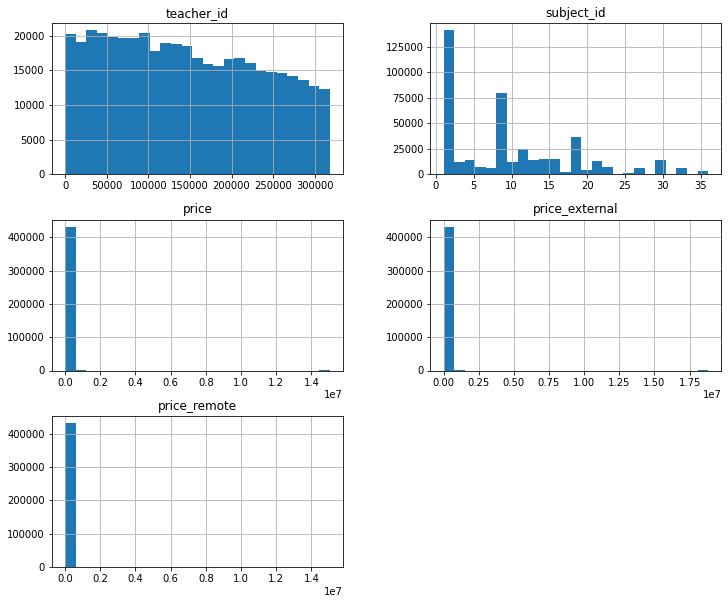

Размер датасета: (432422, 6)
Пропуски
date_update          0
teacher_id        4570
subject_id           0
price                0
price_external       0
price_remote         0
dtype: int64


,date_update,teacher_id,subject_id,price,price_external,price_remote
157917,2016-04-07 17:24:51.540,103605.0,8,1000,1000,800
1158,2008-08-19 02:42:52.240,301.0,6,2000,0,1500
28149,2010-11-07 14:20:23.647,20236.0,11,1000,1000,1000
142734,2015-10-06 13:20:55.760,94411.0,2,1,1,1
85348,2013-09-24 22:11:44.927,57474.0,1,0,1500,800
295574,2020-07-20 12:10:43.170,203953.0,2,0,0,500
280901,2020-02-25 08:54:35.713,194016.0,2,450,0,450
25094,2010-09-26 21:40:31.903,17301.0,1,1400,1400,1400
6791,2009-05-07 19:05:28.767,4973.0,2,800,800,800
377336,2022-09-01 11:12:18.970,269920.0,2,1700,0,1700


In [29]:
first_look(teacher_prices)

ID приведем к целочисленному виду, предварительно убрав пропуски и дубликаты

In [30]:
teacher_prices.dropna(inplace=True)
teacher_prices.drop_duplicates(inplace=True)
teacher_prices['teacher_id'] = teacher_prices['teacher_id'].astype('int')

In [31]:
teacher_prices['date_update'] = pd.to_datetime(teacher_prices['date_update'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')

teacher_prices

,date_update,teacher_id,subject_id,price,price_external,price_remote
0,2008-01-21,300,2,1200,1200,1200
1,2008-01-22,125,13,0,0,3000
2,2008-01-22,125,14,0,0,3000
3,2008-01-22,91,8,2000,0,0
4,2008-02-09,372,33,400,400,400
...,...,...,...,...,...,...
432417,2024-01-26,317929,13,0,500,500
432418,2024-01-26,317929,14,0,500,500
432419,2024-01-26,317928,19,0,1500,1200
432420,2024-01-26,317927,2,0,0,800


In [32]:
#teacher_prices['mean_price'] = teacher_prices.groupby(['teacher_id'])[['price']].transform('mean')

teacher_prices[teacher_prices['price'] != teacher_prices['price_remote']]

,date_update,teacher_id,subject_id,price,price_external,price_remote
1,2008-01-22,125,13,0,0,3000
2,2008-01-22,125,14,0,0,3000
3,2008-01-22,91,8,2000,0,0
14,2008-02-27,276,27,1500,0,0
15,2008-02-27,276,21,1500,0,0
...,...,...,...,...,...,...
432415,2024-01-26,267813,8,0,1200,1200
432417,2024-01-26,317929,13,0,500,500
432418,2024-01-26,317929,14,0,500,500
432419,2024-01-26,317928,19,0,1500,1200


Посчитаем количество изменений цены и количество преподаваемых дисциплин.

In [33]:
teacher_prices['reprice_count'] = teacher_prices.groupby(['teacher_id', 'subject_id'])['date_update'].transform('count') - 1
teacher_prices['discipline_count'] = teacher_prices.groupby(['teacher_id'])['subject_id'].transform('nunique')

teacher_prices

,date_update,teacher_id,subject_id,price,price_external,price_remote,reprice_count,discipline_count
0,2008-01-21,300,2,1200,1200,1200,0,1
1,2008-01-22,125,13,0,0,3000,0,2
2,2008-01-22,125,14,0,0,3000,0,2
3,2008-01-22,91,8,2000,0,0,0,1
4,2008-02-09,372,33,400,400,400,0,1
...,...,...,...,...,...,...,...,...
432417,2024-01-26,317929,13,0,500,500,0,2
432418,2024-01-26,317929,14,0,500,500,0,2
432419,2024-01-26,317928,19,0,1500,1200,0,1
432420,2024-01-26,317927,2,0,0,800,0,1


In [34]:
teacher_prices['teacher_id'].nunique()

271396

Объединим таблицы `teachers_info` и `teacher_prices`

In [35]:
data_teachers = teachers_info.merge(teacher_prices, how='inner', left_on='id', right_on='teacher_id').drop(['teacher_id'], axis=1)
data_teachers.rename(columns={'id': 'teacher_id'}, inplace=True)
data_teachers['date_update'] = pd.to_datetime(data_teachers['date_update'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')

data_teachers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413022 entries, 0 to 413021
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   teacher_id               413022 non-null  int64         
 1   reg_date                 413022 non-null  datetime64[ns]
 2   birth_date               413022 non-null  datetime64[ns]
 3   teaching_start_date      413022 non-null  datetime64[ns]
 4   is_email_confirmed       413022 non-null  int64         
 5   lesson_duration          413022 non-null  int64         
 6   lesson_cost              413022 non-null  int64         
 7   is_display               413022 non-null  int64         
 8   last_visited             336135 non-null  datetime64[ns]
 9   is_pupils_needed         413022 non-null  int32         
 10  is_cell_phone_confirmed  413022 non-null  int64         
 11  area_id                  413022 non-null  int64         
 12  sex             

Дату последнего посещения возьмем как дату апдейта, если дата обновления больше.  
Пропуски в дате последнего визита аналогично возьмем из даты обновления.

In [36]:
data_teachers.loc[data_teachers['last_visited'] < data_teachers['date_update'], 'last_visited'] = data_teachers['date_update']

data_teachers['last_visited'].fillna(data_teachers['date_update'], inplace=True)

data_teachers.query('last_visited != date_update')

,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count
2,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2014-03-06,1,0,0,1800,0,3
3,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2014-07-09,21,0,0,2000,0,3
4,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2022-09-17,33,0,0,2000,0,3
5,52,2007-12-25,1988-07-06,2006-09-01,0,60,1000,1,2020-04-04,0,0,1,2,1,2,34.0,2008-11-01,4,0,1000,1000,0,2
6,52,2007-12-25,1988-07-06,2006-09-01,0,60,1000,1,2020-04-04,0,0,1,2,1,2,34.0,2008-11-01,3,0,1000,1000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376246,276819,2022-10-24,2004-10-05,2021-09-01,0,60,0,1,2022-10-25,0,0,8,2,1,0,18.0,2022-10-24,8,300,400,0,0,1
376248,276823,2022-10-24,1995-01-16,2015-09-01,0,90,800,0,2022-10-25,0,0,1,2,1,0,27.0,2022-10-24,8,0,0,800,0,1
376255,276834,2022-10-24,1993-12-19,2015-09-01,0,45,0,1,2022-10-25,0,0,3,1,1,0,29.0,2022-10-24,8,1000,0,800,0,1
376256,276836,2022-10-24,2001-10-30,2021-09-01,0,60,0,1,2022-10-25,0,0,1,2,1,0,21.0,2022-10-24,8,0,1300,1000,0,1


Аналогично рассчитаем пребывание на сайте


In [37]:
# Оставим дату последнего визита как максимальную по репетитору
data_teachers['last_visited'] = data_teachers.groupby('teacher_id')['last_visited'].transform('max')

In [38]:
data_teachers['registered'] = ((data_teachers['last_visited'] - data_teachers['reg_date'] + pd.Timedelta(days=1)) / np.timedelta64(1,'D')).astype(int)

И стаж преподавания

In [39]:
data_teachers['experience'] = data_teachers['last_visited'].dt.year - data_teachers['teaching_start_date'].dt.year

Немного проверим адекватность дат.

In [40]:
data_teachers.query('(birth_date.dt.year + 16) > teaching_start_date.dt.year')


,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count,registered,experience
0,33,2007-12-25,1983-06-05,1989-09-01,0,60,1000,1,2022-10-31,1,0,1,1,0,6,39.0,2022-10-31,18,500,0,1000,0,1,5425,33
63,110,2007-12-25,1990-07-20,2005-01-01,0,60,600,0,2008-10-21,1,0,1,3,1,0,32.0,2008-10-21,2,600,600,600,0,1,302,3
559,455,2008-02-16,1987-01-27,2002-01-01,0,60,500,0,2008-12-13,1,0,1,2,1,0,35.0,2008-12-13,2,500,500,500,0,2,302,6
560,455,2008-02-16,1987-01-27,2002-01-01,0,60,500,0,2008-12-13,1,0,1,2,1,0,35.0,2008-12-13,20,500,500,500,0,2,302,6
561,456,2008-02-16,1988-03-16,2002-09-01,0,60,1000,0,2013-08-15,1,0,1,2,1,0,34.0,2008-08-18,2,1000,1000,0,0,1,2008,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412892,312470,2023-11-06,2004-09-02,2019-09-01,0,60,0,1,2023-11-06,0,0,9,2,1,0,18.0,2023-11-06,15,700,850,800,0,2,1,4
412997,312599,2023-11-07,2005-05-06,2020-09-01,0,60,0,1,2023-11-08,0,0,2,2,1,0,17.0,2023-11-08,8,0,1200,600,1,1,2,3
412998,312599,2023-11-07,2005-05-06,2020-09-01,0,60,0,1,2023-11-08,0,0,2,2,1,0,17.0,2023-11-08,8,0,1200,600,1,1,2,3
413010,312613,2023-11-08,2004-04-16,2019-09-01,0,45,0,1,2023-11-08,0,0,21,2,1,0,18.0,2023-11-08,8,0,800,800,0,2,1,4


In [41]:
data_teachers.query('age < experience + 16')


,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count,registered,experience
0,33,2007-12-25,1983-06-05,1989-09-01,0,60,1000,1,2022-10-31,1,0,1,1,0,6,39.0,2022-10-31,18,500,0,1000,0,1,5425,33
704,546,2008-02-28,1989-08-25,2005-09-01,0,45,1000,1,2023-06-24,1,0,1,2,1,2,33.0,2008-09-10,8,1300,1500,1000,0,5,5596,18
705,546,2008-02-28,1989-08-25,2005-09-01,0,45,1000,1,2023-06-24,1,0,1,2,1,2,33.0,2023-06-24,29,1300,1500,1300,0,5,5596,18
706,546,2008-02-28,1989-08-25,2005-09-01,0,45,1000,1,2023-06-24,1,0,1,2,1,2,33.0,2023-06-24,10,1500,1700,1500,0,5,5596,18
707,546,2008-02-28,1989-08-25,2005-09-01,0,45,1000,1,2023-06-24,1,0,1,2,1,2,33.0,2023-06-24,2,1500,1700,1300,0,5,5596,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412996,312598,2023-11-07,2004-02-17,2020-02-01,0,60,0,1,2023-11-08,0,0,6,1,0,0,18.0,2023-11-08,2,2500,0,1500,0,1,2,3
412997,312599,2023-11-07,2005-05-06,2020-09-01,0,60,0,1,2023-11-08,0,0,2,2,1,0,17.0,2023-11-08,8,0,1200,600,1,1,2,3
412998,312599,2023-11-07,2005-05-06,2020-09-01,0,60,0,1,2023-11-08,0,0,2,2,1,0,17.0,2023-11-08,8,0,1200,600,1,1,2,3
413010,312613,2023-11-08,2004-04-16,2019-09-01,0,45,0,1,2023-11-08,0,0,21,2,1,0,18.0,2023-11-08,8,0,800,800,0,2,1,4


In [42]:
data_teachers.query('birth_date > reg_date')


,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count,registered,experience


Итого имеем небольшое количество строк с неадекватными данными.  
Почистим датасет от них

In [43]:
data_teachers = data_teachers.query('(birth_date.dt.year + 16) < teaching_start_date.dt.year')
data_teachers = data_teachers.query('age > experience + 16')

# И удалим даты
# teachers_info.drop(['reg_date', 'birth_date', 'teaching_start_date', 'last_visited'], axis=1, inplace=True)
data_teachers

,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count,registered,experience
1,46,2007-12-25,1980-02-12,2003-09-01,0,60,500,0,2008-04-20,1,0,1,3,1,0,42.0,2008-04-20,6,500,500,500,0,1,118,5
2,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2014-03-06,1,0,0,1800,0,3,5390,34
3,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2014-07-09,21,0,0,2000,0,3,5390,34
4,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,1,0,57.0,2022-09-17,33,0,0,2000,0,3,5390,34
5,52,2007-12-25,1988-07-06,2006-09-01,0,60,1000,1,2020-04-04,0,0,1,2,1,2,34.0,2008-11-01,4,0,1000,1000,0,2,4485,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413017,312620,2023-11-08,2004-06-03,2022-09-01,0,60,0,1,2023-11-08,0,0,1,2,1,0,18.0,2023-11-08,2,1000,0,1000,0,1,1,1
413018,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,1,0,23.0,2023-11-08,1,0,0,500,0,3,8,2
413019,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,1,0,23.0,2023-11-08,21,0,0,500,1,3,8,2
413020,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,1,0,23.0,2023-11-15,8,0,0,700,0,3,8,2


Также удалим признак `orders_allowed` - он может давать утечку данных.

In [44]:
data_teachers.drop(['orders_allowed'], axis=1, inplace=True)


In [45]:
data_teachers.drop_duplicates(inplace=True)

In [46]:
data_teachers

,teacher_id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,date_update,subject_id,price,price_external,price_remote,reprice_count,discipline_count,registered,experience
1,46,2007-12-25,1980-02-12,2003-09-01,0,60,500,0,2008-04-20,1,0,1,3,0,42.0,2008-04-20,6,500,500,500,0,1,118,5
2,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,0,57.0,2014-03-06,1,0,0,1800,0,3,5390,34
3,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,0,57.0,2014-07-09,21,0,0,2000,0,3,5390,34
4,51,2007-12-25,1965-04-30,1988-09-01,0,60,1500,0,2022-09-26,1,0,1,2,0,57.0,2022-09-17,33,0,0,2000,0,3,5390,34
5,52,2007-12-25,1988-07-06,2006-09-01,0,60,1000,1,2020-04-04,0,0,1,2,2,34.0,2008-11-01,4,0,1000,1000,0,2,4485,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413017,312620,2023-11-08,2004-06-03,2022-09-01,0,60,0,1,2023-11-08,0,0,1,2,0,18.0,2023-11-08,2,1000,0,1000,0,1,1,1
413018,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,0,23.0,2023-11-08,1,0,0,500,0,3,8,2
413019,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,0,23.0,2023-11-08,21,0,0,500,1,3,8,2
413020,312621,2023-11-08,1999-08-08,2021-09-01,0,60,0,1,2023-11-15,0,0,1,2,0,23.0,2023-11-15,8,0,0,700,0,3,8,2


In [47]:
# Посчитаем общее количество изменений цен
data_teachers['reprice_count'] = data_teachers.groupby(['teacher_id'])['reprice_count'].transform('sum')

#  И уберем колонки с датами
data_teachers.drop(['reg_date', 'birth_date', 'teaching_start_date', 'last_visited', 'date_update'], axis=1, inplace=True)

# Изменение цены
data_teachers['price_delta'] = (
    data_teachers.groupby(['teacher_id', 'subject_id'])['price'].transform('max') - 
    data_teachers.groupby(['teacher_id', 'subject_id'])['price'].transform('min')
)

data_teachers['price_external_delta'] = (
    data_teachers.groupby(['teacher_id', 'subject_id'])['price_external'].transform('max') - 
    data_teachers.groupby(['teacher_id', 'subject_id'])['price_external'].transform('min')
)

data_teachers['price_remote_delta'] = (
    data_teachers.groupby(['teacher_id', 'subject_id'])['price_remote'].transform('max') - 
    data_teachers.groupby(['teacher_id', 'subject_id'])['price_remote'].transform('min')
)


data_teachers.drop(['subject_id'], axis=1, inplace=True)


# Оставим среднюю цену
data_teachers['price'] = data_teachers.groupby(['teacher_id'])['price'].transform('mean')
data_teachers['price_external'] = data_teachers.groupby(['teacher_id'])['price_external'].transform('mean')
data_teachers['price_remote'] = data_teachers.groupby(['teacher_id'])['price_remote'].transform('mean')


In [48]:

data_teachers.drop_duplicates(inplace=True)

data_teachers


,teacher_id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta
1,46,0,60,500,0,1,0,1,3,0,42.0,500.0,500.0,500.000000,0,1,118,5,0,0,0
2,51,0,60,1500,0,1,0,1,2,0,57.0,0.0,0.0,1933.333333,0,3,5390,34,0,0,0
5,52,0,60,1000,1,0,0,1,2,2,34.0,0.0,1000.0,1000.000000,0,2,4485,14,0,0,0
7,54,0,45,400,0,1,0,1,3,0,37.0,400.0,400.0,400.000000,0,1,118,4,0,0,0
8,55,0,60,1000,1,1,0,1,2,0,50.0,1000.0,1000.0,0.000000,0,5,3965,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413015,312617,0,60,0,1,0,0,1,2,0,18.0,0.0,0.0,1100.000000,0,1,2,1,0,0,0
413016,312619,0,60,0,1,0,0,1,2,0,42.0,1700.0,0.0,1600.000000,0,1,3,6,0,0,0
413017,312620,0,60,0,1,0,0,1,2,0,18.0,1000.0,0.0,1000.000000,0,1,1,1,0,0,0
413018,312621,0,60,0,1,0,0,1,2,0,23.0,0.0,0.0,600.000000,2,3,8,2,0,0,0


## Таблица `orders`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id      4 non-null        

None

,id,subject_id,lesson_price,lesson_duration,home_metro_id,working_teacher_id,status_id,prefered_teacher_id,planned_lesson_number,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,is_display_to_teachers
count,1.191861e+06,1.181529e+06,1.191861e+06,1.191861e+06,6.424470e+05,7.059880e+05,1.191861e+06,4.000000e+00,1.191861e+06,5.796980e+05,1.032470e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,1.191861e+06,5.825880e+05,1.191861e+06,1.042385e+06,1.351800e+04,1.191861e+06
mean,2.340488e+06,2.138735e+01,2.019466e+03,7.186754e+01,8.130288e+02,1.644861e+05,2.436352e+01,3.342593e+06,1.952076e+01,6.682231e+05,2.286848e+01,1.423346e+01,2.129868e+02,1.329890e+01,1.268675e+01,1.211135e+01,1.407590e+01,1.160722e+01,1.955505e+01,2.863540e+01,2.237090e-02,9.083526e-02,2.877031e+01,2.325827e+06,9.625180e+05,2.357963e+01,1.388366e+03,9.641678e-01
std,3.445563e+05,6.157333e+03,9.163341e+05,6.130494e+03,8.375082e+03,8.184790e+04,6.130578e+03,1.858466e+05,6.130586e+03,4.013024e+05,6.586820e+03,6.130595e+03,1.111145e+04,6.130597e+03,6.130598e+03,6.130605e+03,6.130596e+03,6.130600e+03,6.130600e+03,6.131385e+03,1.478866e-01,2.873748e-01,6.130570e+03,3.480297e+05,2.177188e+05,6.555417e+03,7.184427e+04,1.858717e-01
min,1.742636e+06,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.300000e+01,1.000000e+00,3.211265e+06,0.000000e+00,4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+01,-1.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.041441e+06,3.000000e+00,5.000000e+02,6.000000e+01,2.280000e+02,1.009130e+05,7.000000e+00,3.211265e+06,1.000000e+01,3.046100e+05,8.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,2.022765e+06,8.680830e+05,7.000000e+00,3.000000e+01,1.000000e+00
50%,2.341556e+06,8.000000e+00,1.000000e+03,6.000000e+01,6.440000e+02,1.695160e+05,1.600000e+01,3.276801e+06,1.000000e+01,7.806650e+05,1.000000e+01,3.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,2.318886e+06,9.896330e+05,1.000000e+01,3.000000e+01,1.000000e+00
75%,2.638720e+06,1.300000e+01,1.500000e+03,6.000000e+01,1.146000e+03,2.343302e+05,1.600000e+01,3.408129e+06,1.000000e+01,9.715650e+05,1.200000e+01,4.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,2.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,2.300000e+01,2.631660e+06,1.125538e+06,1.300000e+01,3.000000e+01,1.000000e+00
max,3.605505e+06,3.605505e+06,1.000000e+09,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,1.000000e+07,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,1.000000e+00,1.000000e+00,3.605505e+06,3.605505e+06,3.605505e+06,3.605505e+06,5.000000e+06,1.000000e+00


Дубликатов обнаружено:  900


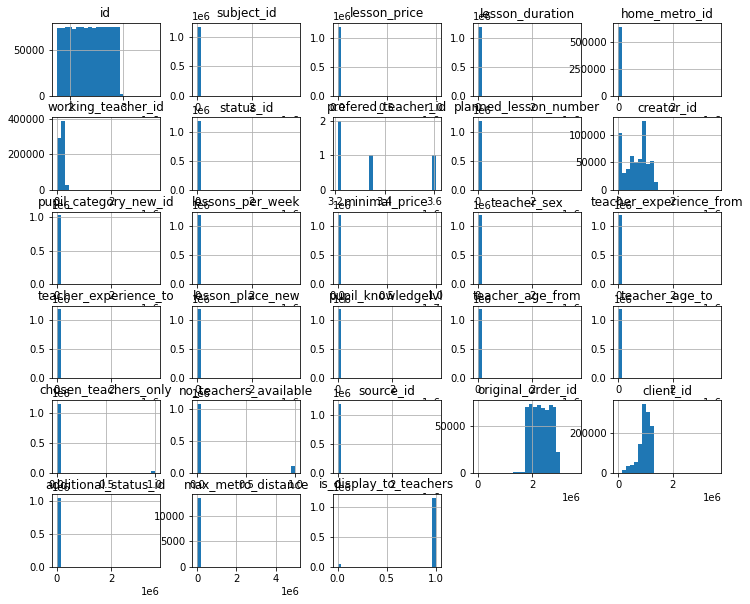

Размер датасета: (1191861, 38)
Пропуски
id                               0
order_date                       0
subject_id                   10332
purpose                     166510
lesson_price                     0
lesson_duration                  0
lesson_place               1191830
home_metro_id               549414
add_info                    147173
start_date                  486283
working_teacher_id          485873
status_id                        0
comments                    850393
prefered_teacher_id        1191857
amount_to_pay                    0
planned_lesson_number            0
first_lesson_date          1025290
creator_id                  612163
pupil_category_new_id       159391
lessons_per_week                 0
minimal_price                    0
teacher_sex                      0
teacher_experience_from          0
teacher_experience_to            0
lesson_place_new                 0
pupil_knowledgelvl               0
teacher_age_from                 0
teacher_age_to 

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
54457,2533074,2023-03-17 13:19:39.747,9.0,Разделы: школьный курс.\nКатегория ученика: школьник 7 класса.\nЦель занятий: помощь по школьно...,600,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю...",2023-03-17 14:52:59.970,288602.0,16,None,NaN,0,10,None,47749.0,8.0,3,0,2,0,0,4,0,0,0,0,0,14,2532672.0,1116385,13.0,NaN,1560,None,1
297690,2140936,2022-08-20 17:50:48.137,2.0,None,0,60,None,NaN,None,None,NaN,7,"Тестовая группа : SplitTestB\n20.08.2022 17:53 - ""Заявка прикреплена к заявке № 2140903"" (Франчи...",NaN,0,0,None,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,16,2140903.0,961246,7.0,NaN,None,None,1
19434,2607445,2023-05-20 08:08:34.357,16.0,Дополнения: ОГЭ (ГИА).\nКатегория ученика: школьник 9 класса.\nЦель занятий: подготовка к ОГЭ.,900,60,None,1982.0,"Район: Ленинский район.\nМесто проведения занятий: дистанционно (например, Skype).\nПредполагаем...",2023-05-20 10:46:29.210,103196.0,16,None,NaN,0,7,None,NaN,10.0,5,700,2,0,0,4,0,0,0,0,0,23,NaN,608977,13.0,NaN,1350,None,1
36192,1877759,2021-12-02 17:34:16.617,10.0,None,0,60,None,NaN,None,None,NaN,16,Тестовая группа : SplitTestA,NaN,0,0,None,NaN,NaN,0,0,0,0,0,4,0,0,0,0,0,16,1877870.0,876363,7.0,NaN,None,None,1
45052,1788085,2021-09-23 10:53:54.973,8.0,Разделы: школьный курс.\nДополнения: ЕГЭ.\nКатегория ученика: школьник 10 класса.\nЦель занятий...,1100,90,None,491.0,"Район: Нижегородский район.\nМесто проведения занятий: дистанционно (например, Skype).\nПредпола...",2021-09-23 14:03:02.373,173344.0,14,Тестовая группа : SplitTestB,NaN,275,10,2021-09-26 00:00:00.000,NaN,11.0,1,0,1,0,0,4,0,18,40,0,0,16,NaN,745859,20.0,NaN,3245,2021-10-01 13:21:05.247,1
364330,2207601,2022-09-20 11:17:46.660,23.0,"Категория ученика: женщина и 3 детей от 15 до 17 лет, приехали из Афганистана.\nУровень знаний: ...",1000,60,None,2402.0,"Район: м. Котельники.\nМесто проведения занятий: у ученика (Сосновая улица, 5, от метро 2 мин. п...",None,NaN,16,None,NaN,0,10,None,879717.0,15.0,6,800,2,10,0,3,1,27,0,0,0,14,2143758.0,974076,8.0,NaN,3400,None,1
91340,1834788,2021-10-25 12:28:08.613,10.0,Разделы: школьный курс.\nДополнения: ОГЭ (ГИА).\nКатегория ученика: школьница 9 класса.\nЦель з...,1000,60,None,316.0,"Район: м. Комендантский проспект.\nМесто проведения занятий: у ученика (Плесецкая улица, 10, от ...",2021-10-26 15:24:39.057,180697.0,14,None,NaN,200,10,2021-11-01 00:00:00.000,556161.0,10.0,2,500,2,0,0,1,0,0,40,0,0,14,1796921.0,641430,20.0,NaN,2600,None,1
203029,2791040,2023-09-13 11:26:35.083,1.0,Дополнения: ЕГЭ.\nКатегория ученика: 11 класс.\nДо экзамена осталось: Несколько месяцев.\nЖелаем...,700,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю...",2023-09-13 12:12:56.170,228223.0,16,None,NaN,0,10,None,1210050.0,12.0,5,0,2,0,0,4,0,0,0,0,0,14,2789323.0,1157756,13.0,NaN,2450,None,1
92462,2386527,2022-12-23 17:19:48.107,9.0,Дополнения: ЕГЭ.\nКатегория ученика: 11 класс.\nЖелаемый балл на экзамене: 30-60.\nТекущий балл ...,5000,60,None,152.0,Как далеко могу ехать к репетитору: Нагатинская .\nЖелаемое время для занятий: воскресенье - в л...,2022-12-23 17:20:18.223,105923.0,16,None,NaN,0,10,None,973436.0,12.0,3,0,3,5,0,7,0,25,50,0,0,14,2386431.0,1057659,17.0,NaN,17250,None,1
75374,1916944,2022-01-13 19:33:10.550,8.0,"Разделы: школьный курс.\nДополнения: ОГЭ (ГИА).\nКатегория ученика: школьница 9 класса, оценка ...",500,60,N

In [49]:
first_look(orders)

In [50]:
# Уберем дубликаты
orders.drop_duplicates(inplace=True)

# И колоки lesson_place, max_metro_distance и prefered_teacher_id - в них практически нет информации
orders.drop(['lesson_place', 'max_metro_distance', 'prefered_teacher_id'], axis=1, inplace=True)


In [51]:
# Даты преобразуем в год-месяц-число
orders['order_date'] = pd.to_datetime(orders['order_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce').dt.round('1d')
orders['start_date'] = pd.to_datetime(orders['start_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce').dt.round('1d')
orders['first_lesson_date'] = pd.to_datetime(orders['first_lesson_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce').dt.round('1d')
orders['payment_date'] = pd.to_datetime(orders['payment_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce').dt.round('1d')



In [52]:
# И посмотрим даты по датасету
print('Начальная дата:', min(orders['order_date']))
print('Конечная дата: ', max(orders['order_date']))


Начальная дата: 2021-09-01 00:00:00
Конечная дата:  2023-11-06 00:00:00


Уберем занятия без обозначенного преподавателя

In [53]:
print('Не отмечен репетитор:', len(orders.query('working_teacher_id.isna()')))

Не отмечен репетитор: 485450


In [54]:
orders.dropna(subset=['working_teacher_id'], inplace=True)

In [55]:
# Приведем к целочисленному виду id и цены
orders['working_teacher_id'] = orders['working_teacher_id'].astype('int')
orders['subject_id'] = orders['subject_id'].astype('int')
orders['amount_to_pay'] = orders['amount_to_pay'].astype(str).str.replace(',', '.').astype('float')

Посмотрим оригинальные id предметов

In [56]:
sorted(orders.subject_id.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 25,
 27,
 29,
 33,
 36,
 3211265,
 3342337,
 3605505]

In [57]:
orders = orders.query('subject_id < 37').reset_index()

In [58]:
orders.info()
#.query('working_teacher_id.isna()')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705508 entries, 0 to 705507
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    705508 non-null  int64         
 1   id                       705508 non-null  int32         
 2   order_date               705508 non-null  datetime64[ns]
 3   subject_id               705508 non-null  int32         
 4   purpose                  705107 non-null  object        
 5   lesson_price             705508 non-null  int32         
 6   lesson_duration          705508 non-null  int32         
 7   home_metro_id            385173 non-null  float32       
 8   add_info                 705034 non-null  object        
 9   start_date               705086 non-null  datetime64[ns]
 10  working_teacher_id       705508 non-null  int32         
 11  status_id                705508 non-null  int32         
 12  comments        

Поищем оригинальные заявки

In [59]:
# Найдем те id, в которых не указан номер оригинальной заявки
original_orders = pd.concat([
    orders.loc[orders['original_order_id'].isna(), 'id'].astype('int'),
    # Добавим id заявок, которые указаны как оригинальные
    orders.loc[orders['original_order_id'].notna(), 'original_order_id'].astype('int')])



original_orders = list(set(original_orders))
print('Уникальных заявок:',len(original_orders))

Уникальных заявок: 410560


In [60]:
orders_cleared = orders.query('id.isin(@original_orders)')

Найдем место проведения занятия.

In [61]:
orders_cleared['order_place'] = orders_cleared['add_info'].apply(
    lambda x: 'internal' if 'у ученика' in str(x)
    else 'external' if 'у преподавателя' in str(x) 
    else 'online' if 'дистанционно' in str(x)
    else 'unknown')

orders_cleared.query('order_place == "unknown"').head()

,index,id,order_date,subject_id,purpose,lesson_price,lesson_duration,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,estimated_fee,payment_date,is_display_to_teachers,order_place
64,191,2294245,2022-11-01,7,"Цели: преодолеть языковой барьер, нагнать пропущенные темы.\nДополнения: HSK.\nКатегория ученика...",1500,60,NaN,Желаемое время для занятий: будни до 11.\nКоличество занятий в неделю: 1-2.\nВозраст репетитора:...,2022-11-01,276242,16,None,0.0,10,NaT,NaN,8.0,3,0,0,0,0,4,3,0,90,0,0,23,NaN,1024506,10.0,5100,NaT,1,unknown
69,200,2294254,2022-11-01,14,"\n​Дополнения : ЕГЭ \n​Цель занятий : Сдача ЕГЭ, поступление в Вуз. \n​Категория ученика : школь...",2000,60,NaN,"\n​Свободное время : Понедельник-вечер,Пятница-вечер \n​Требования к репетитору : Не готовы зани...",2022-11-01,147759,16,Тестовая группа : SplitTestA\n?Статус дозаполнения : начато заполнение клиентом?\n?Статус дозапо...,0.0,10,NaT,1060923.0,12.0,5,1000,2,0,0,4,0,30,50,0,0,16,NaN,1024504,10.0,0,NaT,1,unknown
70,201,2294255,2022-11-01,7,Цели: другое.\nКатегория ученика: 5 класс.\nУровень знаний: с нуля.\nУровень экзамена: A1.\nПред...,900,60,935.0,"Желаемое время для занятий: воскресенье - 10, 11, 13, 15, 16; вторник - 16, 17.\nКоличество заня...",2022-11-01,239038,16,None,0.0,10,NaT,NaN,6.0,3,0,2,0,0,5,1,16,90,0,0,23,NaN,1024509,13.0,2610,NaT,1,unknown
106,262,2294316,2022-11-01,1,Дополнения: ЕГЭ.\nКатегория ученика: 11 класс.\nПредполагаемая дата экзамена: 2023-06-01.\nЖелае...,1500,60,NaN,Желаемое время для занятий: воскресенье - 10.\nКоличество занятий в неделю: 1-2.\nВозраст репети...,2022-11-01,175147,12,None,375.0,10,2022-11-19,NaN,12.0,3,0,0,0,0,4,0,16,30,0,0,23,NaN,1024526,NaN,5250,NaT,1,unknown
118,285,2294339,2022-11-01,13,"Цели: улучшить успеваемость, нагнать пропущенные темы.\nКатегория ученика: 10 класс.\n",500,60,661.0,"Адрес ученика: Респ Башкортостан, г Стерлитамак, ул Шафиева, д 49.\nЖелаемое время для занятий: ...",2022-11-02,96978,16,None,0.0,7,NaT,NaN,11.0,7,0,2,10,0,7,0,16,90,0,0,23,NaN,1024535,10.0,750,NaT,1,unknown


Заполним нулями пропуски в колонках c ID: `home_metro_id`, `creator_id`, `pupil_category_new_id`, `additional_status_id`  
и приведем к целочисленному виду

In [62]:
orders_cleared[['home_metro_id', 'creator_id', 'pupil_category_new_id', 'additional_status_id']] = orders_cleared[['home_metro_id', 'creator_id', 'pupil_category_new_id', 'additional_status_id']].fillna(0).astype('int')



Поскольку в вводных данных указано "`status_id` - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)",  
то заменим факт оплаты на 1 и 0 в противном случае.

In [63]:
orders_cleared['is_payed'] = orders_cleared['status_id'].apply(lambda x: 1 if x in [6, 13] else 0)

Посчитаем заказы по преподавателям

In [64]:
orders_cleared['estimated_fee'] = orders_cleared['estimated_fee'].str.replace(',', '.').astype('float')

In [65]:
orders_grouped = orders_cleared.groupby(by='working_teacher_id', as_index=False).agg({
    'id': 'count',
    'lesson_price': 'mean',
    'lesson_duration': 'mean',
    'is_payed': 'mean',
    'subject_id': 'nunique', #[pd.Series.mode, 'nunique'],
    'pupil_knowledgelvl': 'median',
    'amount_to_pay': 'mean',
    'planned_lesson_number': 'mean',
    'lessons_per_week': 'mean',
    'estimated_fee': 'sum',
    # 'lesson_place_new': pd.Series.mode,
    'client_id': 'nunique'
})

# orders_grouped.columns = ['_'.join(col) for col in orders_grouped.columns]

In [66]:
# orders_grouped['subject_id_mode'] = orders_grouped['subject_id_mode'].apply(lambda x: x if str(x).isdigit() else list(x)[0])

# orders_grouped['lesson_place_new_mode'] = orders_grouped['lesson_place_new_mode'].apply(lambda x: x if str(x).isdigit() else list(x)[0])


# orders_grouped.rename(columns={
#     'id_count': 'orders_total',
#     'lesson_price_mean': 'order_price_mean',
#     'lesson_duration_mean': 'order_duration_mean',
#     'is_payed_mean': 'is_payed_frac',
#     # 'subject_id_mode': 'top_discipline_id',
#     'subject_id_nunique': 'disciplines_count',
#     'amount_to_pay_mean': 'order_cost_mean',
#     # 'lesson_place_new_mode': 'order_lesson_place',
#     'client_id_nunique': 'unique_clients'
# }, inplace=True)

orders_grouped.rename(columns={
    'id': 'orders_total',
    'lesson_price': 'orders_price_mean',
    'lesson_duration': 'orders_duration_mean',
    'is_payed': 'is_payed_frac',
    # 'subject_id_mode': 'top_discipline_id',
    'subject_id': 'disciplines_count',
    'pupil_knowledgelvl': 'pupil_knowledgelvl_median',
    'amount_to_pay': 'orders_cost_mean',
    'planned_lesson_number': 'planned_lesson_number_mean',
    'lessons_per_week': 'lessons_per_week_mean',
    'estimated_fee': 'total_fee',
    # 'lesson_place_new_mode': 'order_lesson_place',
    'client_id': 'unique_clients'
}, inplace=True)

In [67]:
orders_grouped

,working_teacher_id,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients
0,33,4,1800.000000,60.000000,0.000000,3,0.0,62.50000,10.00000,1.750000,16680.0,4
1,51,1,4000.000000,60.000000,0.000000,1,0.0,0.00000,10.00000,4.000000,12400.0,1
2,86,7,1128.571429,68.571429,0.000000,1,0.0,0.00000,10.00000,3.142857,12800.0,7
3,87,15,1460.000000,62.000000,0.333333,1,0.0,1325.00000,10.00000,3.133333,72645.0,15
4,106,32,2298.437500,65.625000,0.250000,2,0.0,1844.53125,9.65625,3.843750,220200.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
50039,312076,2,800.000000,60.000000,0.000000,1,0.0,0.00000,10.00000,3.000000,2490.0,2
50040,312147,1,1200.000000,60.000000,0.000000,1,0.0,0.00000,10.00000,3.000000,3840.0,1
50041,312200,2,1100.000000,60.000000,0.000000,1,2.0,0.00000,10.00000,3.000000,4260.0,2
50042,312244,1,2000.000000,60.000000,0.000000,1,0.0,0.00000,10.00000,3.000000,6100.0,1


In [68]:
orders_cleared = orders_cleared.merge(orders_grouped, how='left', left_on='working_teacher_id', right_on='working_teacher_id')

orders_cleared.columns = ['orders_' + column for column in orders_cleared.columns]

orders_cleared.columns = orders_cleared.columns.str.replace('orders_orders_', 'orders_').str.replace('orders_order_', 'orders_')

orders_cleared#.sample(5)

,orders_index,orders_id,orders_date,orders_subject_id,orders_purpose,orders_lesson_price,orders_lesson_duration,orders_home_metro_id,orders_add_info,orders_start_date,orders_working_teacher_id,orders_status_id,orders_comments,orders_amount_to_pay,orders_planned_lesson_number,orders_first_lesson_date,orders_creator_id,orders_pupil_category_new_id,orders_lessons_per_week,orders_minimal_price,orders_teacher_sex,orders_teacher_experience_from,orders_teacher_experience_to,orders_lesson_place_new,orders_pupil_knowledgelvl,orders_teacher_age_from,orders_teacher_age_to,orders_chosen_teachers_only,orders_no_teachers_available,orders_source_id,orders_original_order_id,orders_client_id,orders_additional_status_id,orders_estimated_fee,orders_payment_date,orders_is_display_to_teachers,orders_place,orders_is_payed,orders_total,orders_price_mean,orders_duration_mean,orders_is_payed_frac,orders_disciplines_count,orders_pupil_knowledgelvl_median,orders_cost_mean,orders_planned_lesson_number_mean,orders_lessons_per_week_mean,orders_total_fee,orders_unique_clients
0,2,2294056,2022-11-01,21,Разделы: начертательная геометрия.\nКатегория ученика: студентка 1 курса.\nЦель занятий: помощь ...,800,60,0,"Место проведения занятий: дистанционно (например, Skype). Время МСК.\nПредполагаемое число занят...",2022-11-01,143480,16,None,0.0,7,NaT,0,14,2,0,3,0,0,4,0,0,0,0,0,23,NaN,1024439,10,1200.0,NaT,1,online,0,32,1095.937500,60.000000,0.000000,2,0.0,235.859375,7.937500,3.156250,64055.0,32
1,17,2294071,2022-11-01,21,Разделы: ораторское искусство.\nКатегория ученика: студент 2 курса.\nЦель занятий: для себя.,3000,60,0,"Место проведения занятий: дистанционно (например, Skype) +3 МСК\nПредполагаемое число занятий в ...",2022-11-02,103525,16,None,0.0,10,NaT,0,14,5,2000,3,0,0,4,0,0,0,0,0,23,NaN,1024443,10,0.0,NaT,1,online,0,38,3415.789474,60.789474,0.289474,4,0.0,0.000000,9.263158,3.421053,71050.0,38
2,18,2294072,2022-11-01,8,Разделы: школьный курс.\nКатегория ученика: школьник 8 класса.\nЦель занятий: улучшить успевае...,1500,60,127,Район: м. Перово.\nМесто проведения занятий: у ученика (ул Кусковская ).\nПредполагаемое число з...,2022-11-02,103581,16,None,0.0,10,NaT,0,9,2,0,3,0,0,1,0,0,0,0,0,23,NaN,1024444,10,2925.0,NaT,1,internal,0,20,1620.000000,63.000000,0.250000,1,0.0,696.250000,10.000000,3.300000,81220.0,20
3,19,2294073,2022-11-01,9,Разделы: теоретическая механика.\nКатегория ученика: студент 2 курса.\nЦель занятий: помощь по п...,1500,60,304,Район: м. Ломоносовская.\nМесто проведения занятий: у преподавателя (м. Ломоносовская).\nПредпол...,2022-11-01,67025,16,None,0.0,1,NaT,0,14,2,0,3,0,0,2,0,0,0,0,0,23,NaN,1024445,13,375.0,NaT,1,external,0,122,1634.426230,61.352459,0.032787,2,0.0,223.719262,6.754098,3.442623,358955.0,119
4,20,2294074,2022-11-01,8,Разделы: школьный курс.\nДополнения: ЕГЭ.\nКатегория ученика: школьник 10 класса.\nЦель занятий...,1000,90,296,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю...",2022-11-02,175576,6,None,2100.0,10,2022-11-03,0,11,5,0,3,1,0,4,0,20,50,0,0,23,NaN,1024446,0,3500.0,2022-11-05,1,online,1,122,827.868852,62.459016,0.270492,1,0.0,491.967213,9.180328,3.713115,267220.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406829,437201,2280492,2022-10-25,8,Разделы: школьный курс.\nДополнения: ЕГЭ.\nКатегория ученика: школьник 11 класса.\nЦель занятий...,2500,60,210,Район: г. Жуковский.\nМесто проведения занятий: у преподавателя (по городу).\nПредполагаемое чис...,2022-10-26,34832,16,None,0.0,10,NaT,0,12,3,0,3,0,0,2,0,20,0,0,0,23,NaN,1019627,10,5875.0,NaT,1,external,0,5,2600.000000,66.000000,0.000000,1,0.0,0.000000,10.000000,3.400000,24800.0,5
406830,437206,2280497,2022-10-25,20,Разделы: постановка звуков.\nКатегория ученика: Взрослые.\n,700,60,0,"Место проведения занятий: дистанционно (Skype).\nПредполагаемое число занятий в н

In [69]:
# Удалим ненужные столбцы

orders_cleared.drop(['orders_purpose',  'orders_add_info', 
                     'orders_status_id', 'orders_comments',  'orders_creator_id', 
                     'orders_pupil_category_new_id',
                     'orders_teacher_experience_from', 'orders_teacher_experience_to',
                     'orders_teacher_age_from', 'orders_teacher_age_to',
                     'orders_chosen_teachers_only', 'orders_no_teachers_available',
                     'orders_source_id', 'orders_original_order_id', 
                     'orders_additional_status_id'], axis=1, inplace=True)



In [70]:
orders_cleared#.query('orders_working_teacher_id == 9677')

,orders_index,orders_id,orders_date,orders_subject_id,orders_lesson_price,orders_lesson_duration,orders_home_metro_id,orders_start_date,orders_working_teacher_id,orders_amount_to_pay,orders_planned_lesson_number,orders_first_lesson_date,orders_lessons_per_week,orders_minimal_price,orders_teacher_sex,orders_lesson_place_new,orders_pupil_knowledgelvl,orders_client_id,orders_estimated_fee,orders_payment_date,orders_is_display_to_teachers,orders_place,orders_is_payed,orders_total,orders_price_mean,orders_duration_mean,orders_is_payed_frac,orders_disciplines_count,orders_pupil_knowledgelvl_median,orders_cost_mean,orders_planned_lesson_number_mean,orders_lessons_per_week_mean,orders_total_fee,orders_unique_clients
0,2,2294056,2022-11-01,21,800,60,0,2022-11-01,143480,0.0,7,NaT,2,0,3,4,0,1024439,1200.0,NaT,1,online,0,32,1095.937500,60.000000,0.000000,2,0.0,235.859375,7.937500,3.156250,64055.0,32
1,17,2294071,2022-11-01,21,3000,60,0,2022-11-02,103525,0.0,10,NaT,5,2000,3,4,0,1024443,0.0,NaT,1,online,0,38,3415.789474,60.789474,0.289474,4,0.0,0.000000,9.263158,3.421053,71050.0,38
2,18,2294072,2022-11-01,8,1500,60,127,2022-11-02,103581,0.0,10,NaT,2,0,3,1,0,1024444,2925.0,NaT,1,internal,0,20,1620.000000,63.000000,0.250000,1,0.0,696.250000,10.000000,3.300000,81220.0,20
3,19,2294073,2022-11-01,9,1500,60,304,2022-11-01,67025,0.0,1,NaT,2,0,3,2,0,1024445,375.0,NaT,1,external,0,122,1634.426230,61.352459,0.032787,2,0.0,223.719262,6.754098,3.442623,358955.0,119
4,20,2294074,2022-11-01,8,1000,90,296,2022-11-02,175576,2100.0,10,2022-11-03,5,0,3,4,0,1024446,3500.0,2022-11-05,1,online,1,122,827.868852,62.459016,0.270492,1,0.0,491.967213,9.180328,3.713115,267220.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406829,437201,2280492,2022-10-25,8,2500,60,210,2022-10-26,34832,0.0,10,NaT,3,0,3,2,0,1019627,5875.0,NaT,1,external,0,5,2600.000000,66.000000,0.000000,1,0.0,0.000000,10.000000,3.400000,24800.0,5
406830,437206,2280497,2022-10-25,20,700,60,0,2022-10-25,87637,0.0,10,NaT,3,0,3,4,0,1019629,1890.0,NaT,1,online,0,21,1033.333333,60.000000,0.333333,1,0.0,590.238095,9.142857,3.761905,51435.0,21
406831,437207,2280498,2022-10-25,8,1000,60,216,2022-10-25,249284,0.0,10,NaT,3,0,3,2,0,1019630,1500.0,NaT,1,external,0,45,1394.444444,61.333333,0.288889,2,0.0,1000.333333,9.933333,3.444444,188435.0,45
406832,437212,2280503,2022-10-25,9,1000,60,0,2022-10-25,205868,2650.0,10,2022-11-10,2,800,2,4,0,824363,2650.0,2022-11-18,1,online,1,19,1165.789474,64.736842,0.315789,3,0.0,201.315789,9.684211,3.263158,6705.0,19


## Таблица `lessons`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191127 entries, 0 to 1191126
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   id                1191127 non-null  int32   
 1   lesson_course_id  1191127 non-null  int32   
 2   lesson_date       1191127 non-null  category
 3   time_from         1191127 non-null  category
 4   time_to           1191127 non-null  category
 5   home_task         4969 non-null     category
 6   is_regular        1191127 non-null  int8    
 7   amount_to_pay     593376 non-null   float64 
 8   amount_paid       8143 non-null     float64 
dtypes: category(4), float64(2), int32(2), int8(1)
memory usage: 37.9 MB


None

,id,lesson_course_id,is_regular,amount_to_pay,amount_paid
count,1.191127e+06,1.191127e+06,1.191127e+06,5.933760e+05,8143.000000
mean,2.924256e+06,9.922974e+05,1.695839e-01,1.183844e+03,1817.346801
std,7.860067e+05,2.711573e+05,3.752670e-01,4.684526e+03,972.736517
min,1.357970e+05,3.000000e+00,0.000000e+00,0.000000e+00,200.000000
25%,2.238784e+06,8.177580e+05,0.000000e+00,7.000000e+02,1100.000000
50%,2.891741e+06,9.833430e+05,0.000000e+00,1.000000e+03,1500.000000
75%,3.546280e+06,1.157515e+06,0.000000e+00,1.500000e+03,2000.000000
max,4.516941e+06,1.610713e+06,1.000000e+00,2.500000e+06,24000.000000


Дубликатов обнаружено:  0


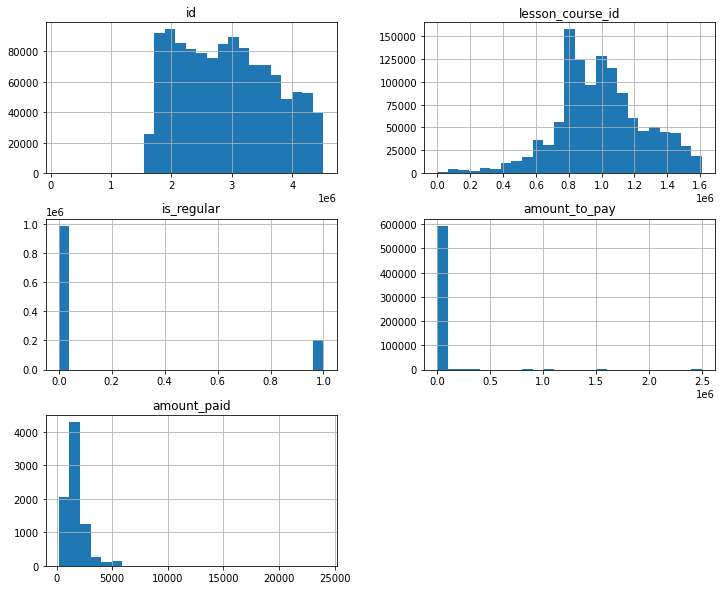

Размер датасета: (1191127, 9)
Пропуски
id                        0
lesson_course_id          0
lesson_date               0
time_from                 0
time_to                   0
home_task           1186158
is_regular                0
amount_to_pay        597751
amount_paid         1182984
dtype: int64


,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
1159891,4369648,1518693,2023-12-27 00:00:00.000,13:00:00,13:30:00,NaN,0,500.0,NaN
780203,3267931,1160338,2023-01-24 00:00:00.000,21:00:00,22:00:00,NaN,0,NaN,NaN
631689,2961612,992331,2022-12-23 00:00:00.000,19:00:00,20:00:00,NaN,0,1500.0,NaN
410560,2481308,657921,2023-03-30 00:00:00.000,11:00:00,12:00:00,NaN,0,NaN,NaN
810997,3340606,789354,2023-02-09 00:00:00.000,20:00:00,21:00:00,NaN,0,NaN,NaN
525669,2744155,570772,2022-11-04 00:00:00.000,16:00:00,17:00:00,NaN,0,700.0,NaN
758933,3219229,1151849,2023-01-14 00:00:00.000,08:00:00,09:00:00,NaN,0,NaN,NaN
904751,3575098,1259046,2023-04-23 00:00:00.000,11:00:00,12:00:00,NaN,0,1000.0,NaN
412773,2485003,960366,2022-05-30 00:00:00.000,10:50:00,11:50:00,NaN,0,NaN,NaN
134756,1918973,830999,2022-08-10 00:00:00.000,14:00:00,15:00:00,NaN,0,1000.0,NaN


In [71]:
first_look(lessons)

In [72]:
# Аналогично оставим только дату
lessons['lesson_date'] = pd.to_datetime(lessons['lesson_date'], format='%Y-%m-%d %H:%M:%S.%f').dt.round('1d')

# А в колонках со временем нужно время
lessons['time_to'] = pd.to_datetime(lessons['time_to'],).dt.floor('s')
lessons['time_from'] = pd.to_datetime(lessons['time_from']).dt.floor('s')


Посчитаем фактическую длительность урока.

In [73]:
lessons['fact_duration'] = (lessons['time_to'] - lessons['time_from']).dt.seconds / 60
lessons

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid,fact_duration
0,135797,347,2023-04-14,2024-04-13 12:45:00,2024-04-13 13:50:00,NaN,1,NaN,NaN,65.0
1,283596,185756,2022-11-15,2024-04-13 20:30:00,2024-04-13 21:30:00,NaN,0,NaN,NaN,60.0
2,322184,184189,2022-12-15,2024-04-13 16:00:00,2024-04-13 17:30:00,NaN,0,NaN,NaN,90.0
3,371621,213849,2023-02-13,2024-04-13 19:30:00,2024-04-13 20:30:00,NaN,0,NaN,NaN,60.0
4,375586,196475,2023-02-16,2024-04-13 10:00:00,2024-04-13 11:00:00,NaN,0,NaN,NaN,60.0
...,...,...,...,...,...,...,...,...,...,...
1191122,4516915,1465794,2023-12-25,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0
1191123,4516919,1465794,2024-01-22,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0
1191124,4516920,1465794,2024-01-29,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0
1191125,4516940,1525472,2024-02-01,2024-04-13 12:30:00,2024-04-13 13:30:00,NaN,0,NaN,NaN,60.0


Добавим колонку с признаком домашнего задания.

In [74]:
lessons['is_home_task'] = lessons['home_task'].apply(lambda x: 1 if str(x) != '' else 0).fillna(0).astype('int')
lessons

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid,fact_duration,is_home_task
0,135797,347,2023-04-14,2024-04-13 12:45:00,2024-04-13 13:50:00,NaN,1,NaN,NaN,65.0,0
1,283596,185756,2022-11-15,2024-04-13 20:30:00,2024-04-13 21:30:00,NaN,0,NaN,NaN,60.0,0
2,322184,184189,2022-12-15,2024-04-13 16:00:00,2024-04-13 17:30:00,NaN,0,NaN,NaN,90.0,0
3,371621,213849,2023-02-13,2024-04-13 19:30:00,2024-04-13 20:30:00,NaN,0,NaN,NaN,60.0,0
4,375586,196475,2023-02-16,2024-04-13 10:00:00,2024-04-13 11:00:00,NaN,0,NaN,NaN,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1191122,4516915,1465794,2023-12-25,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0
1191123,4516919,1465794,2024-01-22,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0
1191124,4516920,1465794,2024-01-29,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0
1191125,4516940,1525472,2024-02-01,2024-04-13 12:30:00,2024-04-13 13:30:00,NaN,0,NaN,NaN,60.0,0


Посчитаем долю фактических занятий, оставим лишь фактические уроки (т. е. оплаченные)

In [75]:
lessons['fact_lessons_frac'] = lessons.groupby('lesson_course_id')['amount_paid'].transform('count') / lessons.groupby('lesson_course_id')['amount_paid'].transform(lambda x: len(x))

lessons['is_fact_lesson'] = lessons['amount_paid'].notna()

lessons_fact = lessons#.query('is_fact_lesson == True')

Посчитаем даты начала и конца занятий с учеником, продолжительность курса, общую стоимость, цену за минуту

In [76]:
lessons_fact['max_date'] = lessons_fact.groupby('lesson_course_id')['lesson_date'].transform('max')
lessons_fact['min_date'] = lessons_fact.groupby('lesson_course_id')['lesson_date'].transform('min')
lessons_fact['course_duration'] = (lessons_fact['max_date'] - lessons_fact['min_date']).dt.days + 1

lessons_fact['total_paid'] = lessons_fact.groupby('lesson_course_id')['amount_paid'].transform('sum')
lessons_fact['total_to_pay'] = lessons_fact.groupby('lesson_course_id')['amount_to_pay'].transform('sum')

lessons_fact['lessons_count'] = lessons_fact.groupby('lesson_course_id')['amount_paid'].transform('count')
lessons_fact['price_per_min_mean'] = lessons_fact['total_paid'] / lessons_fact.groupby('lesson_course_id')['fact_duration'].transform('sum')

lessons_fact

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid,fact_duration,is_home_task,fact_lessons_frac,is_fact_lesson,max_date,min_date,course_duration,total_paid,total_to_pay,lessons_count,price_per_min_mean
0,135797,347,2023-04-14,2024-04-13 12:45:00,2024-04-13 13:50:00,NaN,1,NaN,NaN,65.0,0,0.0,False,2023-05-11,2023-04-12,30,0.0,2250.0,0,0.0
1,283596,185756,2022-11-15,2024-04-13 20:30:00,2024-04-13 21:30:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2022-11-15,2022-11-15,1,0.0,0.0,0,0.0
2,322184,184189,2022-12-15,2024-04-13 16:00:00,2024-04-13 17:30:00,NaN,0,NaN,NaN,90.0,0,0.0,False,2022-12-15,2022-12-15,1,0.0,0.0,0,0.0
3,371621,213849,2023-02-13,2024-04-13 19:30:00,2024-04-13 20:30:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2023-02-13,2023-02-13,1,0.0,0.0,0,0.0
4,375586,196475,2023-02-16,2024-04-13 10:00:00,2024-04-13 11:00:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2023-02-16,2023-02-16,1,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191122,4516915,1465794,2023-12-25,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2024-01-31,2023-10-16,108,0.0,16900.0,0,0.0
1191123,4516919,1465794,2024-01-22,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2024-01-31,2023-10-16,108,0.0,16900.0,0,0.0
1191124,4516920,1465794,2024-01-29,2024-04-13 20:00:00,2024-04-13 21:00:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2024-01-31,2023-10-16,108,0.0,16900.0,0,0.0
1191125,4516940,1525472,2024-02-01,2024-04-13 12:30:00,2024-04-13 13:30:00,NaN,0,NaN,NaN,60.0,0,0.0,False,2024-02-01,2023-11-20,74,0.0,4500.0,0,0.0


In [77]:
lessons_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191127 entries, 0 to 1191126
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1191127 non-null  int32         
 1   lesson_course_id    1191127 non-null  int32         
 2   lesson_date         1191127 non-null  datetime64[ns]
 3   time_from           1191127 non-null  datetime64[ns]
 4   time_to             1191127 non-null  datetime64[ns]
 5   home_task           4969 non-null     category      
 6   is_regular          1191127 non-null  int8          
 7   amount_to_pay       593376 non-null   float64       
 8   amount_paid         8143 non-null     float64       
 9   fact_duration       1191127 non-null  float64       
 10  is_home_task        1191127 non-null  int32         
 11  fact_lessons_frac   1191127 non-null  float64       
 12  is_fact_lesson      1191127 non-null  bool          
 13  max_date    

## Таблица `lesson_course`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893438 entries, 0 to 893437
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 893438 non-null  int64  
 1   client_id          893437 non-null  float64
 2   teacher_id         893438 non-null  int64  
 3   order_id           890132 non-null  float64
 4   lesson_place       893438 non-null  int64  
 5   lesson_price       893438 non-null  int64  
 6   is_active          893438 non-null  int64  
 7   lesson_duration    893438 non-null  int64  
 8   date_updated       893438 non-null  object 
 9   suspend_till_date  893438 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 68.2+ MB


None

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration
count,8.934380e+05,8.934370e+05,893438.000000,8.901320e+05,893438.000000,8.934380e+05,893438.000000,8.934380e+05
mean,1.052919e+06,9.104992e+05,156999.072977,2.201949e+06,3.399830,1.284200e+03,0.222249,-4.737214e+03
std,2.599766e+05,2.360247e+05,79431.722496,4.524514e+05,1.554386,3.624318e+03,0.415758,3.213024e+06
min,1.000000e+01,1.000000e+00,33.000000,1.100000e+01,0.000000,0.000000e+00,0.000000,-2.147484e+09
25%,8.303462e+05,7.685850e+05,95659.000000,1.808246e+06,2.000000,7.000000e+02,0.000000,6.000000e+01
50%,1.053760e+06,9.266170e+05,160006.000000,2.219964e+06,4.000000,1.000000e+03,0.000000,6.000000e+01
75%,1.277182e+06,1.107521e+06,220809.000000,2.602854e+06,4.000000,1.500000e+03,0.000000,6.000000e+01
max,1.505419e+06,1.268616e+06,312244.000000,2.936670e+06,7.000000,2.500000e+06,1.000000,8.032022e+06


Дубликатов обнаружено:  0


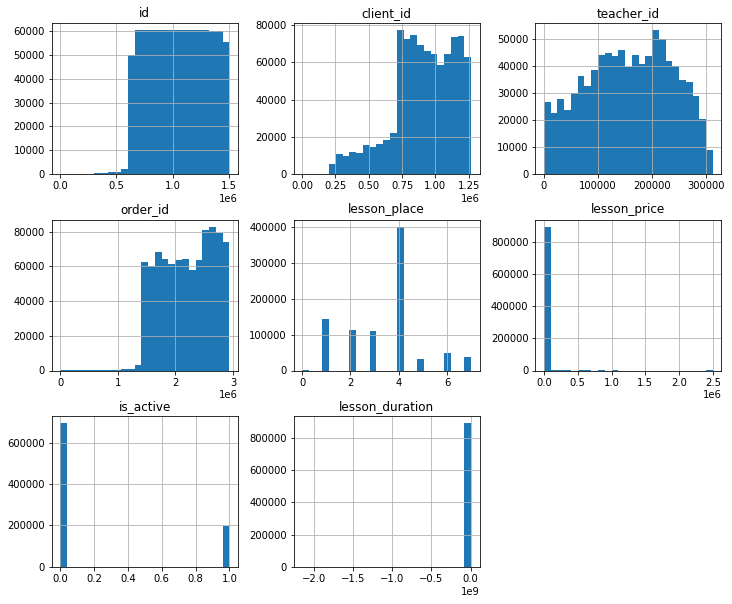

Размер датасета: (893438, 10)
Пропуски
id                      0
client_id               1
teacher_id              0
order_id             3306
lesson_place            0
lesson_price            0
is_active               0
lesson_duration         0
date_updated            0
suspend_till_date       0
dtype: int64


,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
848651,1361648,319749.0,254708,2723438.0,4,1500,0,60,2023-08-23 16:38:06.183,1800-01-01 00:00:00.000
854781,1478027,1238493.0,270183,2853499.0,2,900,1,60,2023-10-05 13:50:58.137,1800-01-01 00:00:00.000
591969,1303600,1159148.0,269247,2639586.0,4,900,0,60,2023-06-17 13:03:28.127,1800-01-01 00:00:00.000
364913,759362,525339.0,162181,1681999.0,1,3500,0,60,2021-05-30 13:45:54.463,1800-01-01 00:00:00.000
107723,671615,719130.0,108634,1517214.0,4,900,0,60,2020-11-20 15:17:53.380,1800-01-01 00:00:00.000
840691,1382574,1201914.0,152444,2754949.0,3,2000,0,60,2023-09-04 11:39:39.470,1800-01-01 00:00:00.000
668245,1321946,1169114.0,229891,2665186.0,2,1500,0,60,2023-07-11 12:15:47.970,1800-01-01 00:00:00.000
378412,999207,964786.0,237459,2119908.0,2,600,1,60,2022-08-01 14:26:33.480,1800-01-01 00:00:00.000
565657,1298580,1143126.0,104273,2632537.0,2,2000,1,60,2023-06-11 13:10:25.953,1800-01-01 00:00:00.000
736064,1296554,1155350.0,144893,2629884.0,4,1500,0,60,2023-06-08 09:43:07.683,1800-01-01 00:00:00.000


In [78]:
first_look(lesson_course)

Удалим пропуски, так как они не дадут идентифицировать урок.

In [79]:
lesson_course.dropna(inplace=True)

In [80]:
lesson_course['date_updated'] = pd.to_datetime(lesson_course['date_updated'])

Приведем числовые данные к целочисленному виду

In [81]:
lesson_course['client_id'] = lesson_course['client_id'].astype('int')
lesson_course['order_id'] = lesson_course['order_id'].astype('int')

In [82]:
lesson_course['client_id'].duplicated().sum()

483971

Посмотрим на цены

In [83]:
lesson_course.query('lesson_price == 0 & lesson_duration == 0')

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
1,242243,429075,106838,720876,1,0,0,0,2021-12-03 23:05:52.873,2020-08-01 00:00:00.000
2,242364,429089,14700,720912,1,0,0,0,2022-05-25 07:27:15.077,2019-09-08 14:22:41.940
3,242476,428940,138783,721219,1,0,0,0,2021-06-22 20:36:53.287,2018-09-03 00:00:00.000
5,243190,429404,38361,721693,4,0,0,0,2021-07-13 21:13:20.973,2019-07-21 00:00:00.000
7,243576,246298,59336,723036,2,0,0,0,2021-04-25 14:33:55.633,2020-09-06 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...
869880,1493266,1264139,310973,2924008,4,0,0,0,2023-10-30 19:44:19.613,1800-01-01 00:00:00.000
869882,1493268,1264139,246002,2924854,4,0,0,0,2023-10-30 19:45:09.853,1800-01-01 00:00:00.000
869905,1493292,1264139,214101,2924911,4,0,1,0,2023-10-30 20:03:23.533,1800-01-01 00:00:00.000
871155,1494561,1264139,262564,2926884,4,0,1,0,2023-10-31 17:54:20.440,1800-01-01 00:00:00.000


In [84]:
#lesson_course = lesson_course.query('lesson_price != 0 & lesson_duration != 0')

In [85]:
lesson_course['active_courses_frac'] = lesson_course.groupby('teacher_id')['is_active'].transform('mean')

lesson_course

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date,active_courses_frac
0,240884,427831,133738,718009,2,1000,1,60,2021-04-25 23:08:17.883,2018-08-27 00:00:00.000,0.457143
1,242243,429075,106838,720876,1,0,0,0,2021-12-03 23:05:52.873,2020-08-01 00:00:00.000,0.266667
2,242364,429089,14700,720912,1,0,0,0,2022-05-25 07:27:15.077,2019-09-08 14:22:41.940,0.181818
3,242476,428940,138783,721219,1,0,0,0,2021-06-22 20:36:53.287,2018-09-03 00:00:00.000,0.000000
4,242942,424704,3476,720891,4,600,0,60,2021-12-19 13:29:29.257,2022-03-20 00:00:00.000,0.224138
...,...,...,...,...,...,...,...,...,...,...,...
893433,1471872,1252133,303803,2891331,2,700,1,60,2023-10-19 18:01:40.443,1800-01-01 00:00:00.000,0.250000
893434,1471873,1252235,104006,2891600,3,1500,0,60,2023-10-17 14:33:55.870,1800-01-01 00:00:00.000,0.272727
893435,1471874,847887,290119,2892571,4,1500,0,60,2023-10-17 14:39:33.830,1800-01-01 00:00:00.000,0.145833
893436,1471875,1251873,173857,2890717,6,1500,0,60,2023-10-17 14:40:20.520,1800-01-01 00:00:00.000,0.277108


# Создание датафрейма для обучения моделей

Объединим данные по репетиторам.

In [86]:
data = teachers.merge(data_teachers, how='inner', left_on='id', right_on='teacher_id')

#data.drop(['teacher_id', 'reg_date', 'birth_date', 'teaching_start_date', 'last_visited', 'date_update'], axis=1, inplace=True)

In [87]:
data = data.merge(orders_grouped, how='inner', left_on='id', right_on='working_teacher_id')

In [88]:
data

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,teacher_id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,working_teacher_id,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients
0,198013,470,1284.221748,469,0.666667,78.166667,602300,0,198013,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7
1,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,153845,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23
2,42869,505,2500.000000,184,0.142857,61.333333,460000,0,42869,0,60,2500,1,0,0,2,2,64,57.0,0.000000,0.0,2500.000000,0,1,3685,20,0,0,0,42869,12,2541.666667,60.000000,0.416667,1,2.0,1435.416667,10.000000,3.666667,40825.0,12
3,127280,442,1879.338843,363,0.150000,60.500000,682200,0,127280,0,60,1500,1,0,0,1,2,10,36.0,2500.000000,3000.0,2500.000000,0,1,1654,17,0,0,0,127280,10,2590.000000,58.500000,0.300000,1,2.0,0.000000,9.700000,3.300000,15290.0,10
4,283905,694,1252.434457,534,0.257143,59.333333,668800,0,283905,0,45,1178,1,0,0,116,2,1,49.0,1178.000000,0.0,1178.000000,0,3,1,31,0,0,0,283905,20,1548.900000,60.000000,0.350000,3,0.0,0.000000,9.850000,4.050000,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,294498,1,1500.000000,1,0.166667,1.000000,1500,0,294498,0,60,1500,0,0,0,38,2,1,25.0,0.000000,0.0,1500.000000,0,1,1,6,0,0,0,294498,1,1500.000000,60.000000,1.000000,1,3.0,0.000000,10.000000,2.000000,0.0,1
1502,3619,1,1300.000000,1,0.111111,1.000000,1300,0,3619,0,60,1300,1,0,0,1,2,3,35.0,1300.000000,1400.0,1300.000000,0,2,5075,17,0,0,0,3619,4,1250.000000,60.000000,0.250000,1,2.0,0.000000,9.250000,3.000000,0.0,4
1503,238509,4,900.000000,1,0.071429,1.000000,900,1,238509,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,238509,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14
1504,180353,1,1700.000000,1,0.100000,1.000000,1700,0,180353,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,180353,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28


Сформируем признаки, найденные при ручной проверке.

1. Несоответствие цены в заявке, в анкете репетитора и реальной.

In [89]:
lesson_merged = pd.merge(
    lesson_course.drop(['date_updated', 'suspend_till_date'], axis=1), 
    lessons_fact.drop(['time_from', 'time_to', 'home_task'], axis=1),
    left_on='id', right_on='lesson_course_id', how='inner'
    )

In [90]:
lesson_merged.columns

Index(['id_x', 'client_id', 'teacher_id', 'order_id', 'lesson_place',
       'lesson_price', 'is_active', 'lesson_duration', 'active_courses_frac',
       'id_y', 'lesson_course_id', 'lesson_date', 'is_regular',
       'amount_to_pay', 'amount_paid', 'fact_duration', 'is_home_task',
       'fact_lessons_frac', 'is_fact_lesson', 'max_date', 'min_date',
       'course_duration', 'total_paid', 'total_to_pay', 'lessons_count',
       'price_per_min_mean'],
      dtype='object')

In [91]:
lesson_merged.rename(columns={'id_x': 'course_id', 'id_y': 'lesson_id'}, inplace=True)

lesson_merged.columns = ['lesson_' + column for column in lesson_merged.columns]

lesson_merged.drop(['lesson_lesson_course_id', 'lesson_lesson_date', 'lesson_is_fact_lesson', 'lesson_max_date'], axis=1, inplace=True)

lesson_merged.columns = lesson_merged.columns.str.replace('lesson_lesson_', 'lesson_').str.replace('lesson_lessons_', 'lesson_')

In [92]:
lesson_merged.columns

Index(['lesson_course_id', 'lesson_client_id', 'lesson_teacher_id',
       'lesson_order_id', 'lesson_place', 'lesson_price', 'lesson_is_active',
       'lesson_duration', 'lesson_active_courses_frac', 'lesson_id',
       'lesson_is_regular', 'lesson_amount_to_pay', 'lesson_amount_paid',
       'lesson_fact_duration', 'lesson_is_home_task',
       'lesson_fact_lessons_frac', 'lesson_min_date', 'lesson_course_duration',
       'lesson_total_paid', 'lesson_total_to_pay', 'lesson_count',
       'lesson_price_per_min_mean'],
      dtype='object')

In [93]:
lesson_merged = lesson_merged.merge(
    orders_cleared, 
    # orders_grouped    
    how='inner', 
    left_on=['lesson_teacher_id', 'lesson_order_id'], 
    right_on=['orders_working_teacher_id', 'orders_id']
    )


In [94]:
lesson_merged.drop('lesson_id', axis=1).duplicated().sum()

423990

In [95]:
lesson_merged = lesson_merged.drop_duplicates()

In [96]:
lesson_merged.drop([
    'orders_working_teacher_id', 'lesson_min_date',
    'orders_id', 'orders_date', 'orders_subject_id', 
    'orders_start_date', 'orders_first_lesson_date', 'orders_working_teacher_id', 'orders_index',
    'orders_client_id', 'orders_estimated_fee', 'orders_payment_date', 'orders_is_display_to_teachers'
    ], axis=1, inplace=True)

# lesson_merged.drop([
#     'lesson_course_id', 'lesson_client_id',
#     'lesson_order_id', 'lesson_id', 'lesson_min_date'
#     ], axis=1, inplace=True)

In [97]:
lesson_merged#.info()

,lesson_course_id,lesson_client_id,lesson_teacher_id,lesson_order_id,lesson_place,lesson_price,lesson_is_active,lesson_duration,lesson_active_courses_frac,lesson_id,lesson_is_regular,lesson_amount_to_pay,lesson_amount_paid,lesson_fact_duration,lesson_is_home_task,lesson_fact_lessons_frac,lesson_course_duration,lesson_total_paid,lesson_total_to_pay,lesson_count,lesson_price_per_min_mean,orders_lesson_price,orders_lesson_duration,orders_home_metro_id,orders_amount_to_pay,orders_planned_lesson_number,orders_lessons_per_week,orders_minimal_price,orders_teacher_sex,orders_lesson_place_new,orders_pupil_knowledgelvl,orders_place,orders_is_payed,orders_total,orders_price_mean,orders_duration_mean,orders_is_payed_frac,orders_disciplines_count,orders_pupil_knowledgelvl_median,orders_cost_mean,orders_planned_lesson_number_mean,orders_lessons_per_week_mean,orders_total_fee,orders_unique_clients
0,805575,839109,211331,1759666,1,800,1,60,0.500000,1810144,0,800.0,NaN,60.0,0,0.0,1,0.0,800.0,0,0.0,700,60,166,2800.0,10,6,0,3,1,2,internal,1,1,700.000000,60.000000,1.000000,1,2.0,2800.000000,10.000000,6.000000,2450.0,1
1,805576,243239,153141,1763236,3,1000,1,60,0.333333,1791413,0,NaN,NaN,60.0,0,0.0,1,0.0,0.0,0,0.0,2000,60,199,3100.0,10,3,1000,3,3,0,internal,1,8,1212.500000,67.500000,0.500000,2,0.0,1620.000000,10.000000,3.375000,27720.0,8
2,805583,761617,151499,1763304,1,1000,1,60,0.388889,1763641,0,NaN,NaN,60.0,0,0.0,1,0.0,0.0,0,0.0,1000,60,295,250.0,10,2,700,2,1,0,internal,0,18,1266.666667,60.833333,0.111111,1,0.0,494.444444,10.000000,3.722222,66275.0,18
3,805590,243239,21535,1763201,3,1300,1,60,0.545455,1763837,0,NaN,NaN,60.0,0,0.0,1,0.0,0.0,0,0.0,2000,60,199,3900.0,10,3,1000,3,3,0,internal,1,3,1666.666667,60.000000,0.666667,1,0.0,2556.666667,10.000000,4.000000,14400.0,3
4,805595,840043,131837,1762815,4,1000,1,60,0.270270,1763621,0,NaN,NaN,60.0,0,0.0,1,0.0,0.0,0,0.0,1000,60,221,3200.0,10,3,500,3,4,0,online,1,12,1737.500000,70.000000,0.166667,1,0.0,616.666667,10.000000,2.750000,68705.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565055,1471827,1252428,199627,2892127,4,0,1,60,0.243243,4126015,0,1330.0,NaN,60.0,0,0.0,67,0.0,26600.0,0,0.0,1500,60,0,0.0,10,3,0,0,4,3,unknown,1,8,1450.000000,60.000000,0.250000,1,2.5,400.000000,10.000000,3.625000,3200.0,8
565056,1471853,1252494,211703,2892464,4,1500,1,60,0.248120,4121426,0,NaN,NaN,30.0,0,0.0,6,0.0,1500.0,0,0.0,1500,60,0,5025.0,10,3,0,0,4,0,unknown,0,75,1243.333333,63.200000,0.240000,2,0.0,793.300000,9.306667,3.373333,253630.0,74
565057,1471853,1252494,211703,2892464,4,1500,1,60,0.248120,4122391,0,1500.0,NaN,60.0,0,0.0,6,0.0,1500.0,0,0.0,1500,60,0,5025.0,10,3,0,0,4,0,unknown,0,75,1243.333333,63.200000,0.240000,2,0.0,793.300000,9.306667,3.373333,253630.0,74
565058,1471872,1252133,303803,2891331,2,700,1,60,0.250000,4129736,0,700.0,NaN,60.0,0,0.0,8,0.0,700.0,0,0.0,500,60,952,0.0,10,3,0,0,2,0,unknown,0,8,637.500000,60.000000,0.000000,1,0.0,0.000000,10.000000,2.750000,13525.0,8


In [98]:
lesson_merged['is_same_prices'] = lesson_merged.apply(lambda x: x.lesson_amount_paid == x.lesson_price == x.orders_lesson_price, axis = 1)


lesson_merged = lesson_merged.drop_duplicates()

In [99]:
lesson_merged.loc[lesson_merged['orders_lesson_price'] == 0, 'orders_lesson_price'] = 1

In [100]:
lesson_merged['price_ratio'] = lesson_merged.groupby('lesson_teacher_id')['lesson_amount_paid'].transform('sum') / lesson_merged.groupby('lesson_teacher_id')['orders_lesson_price'].transform('sum')

lesson_merged['duration_ratio'] = lesson_merged.groupby('lesson_teacher_id')['lesson_duration'].transform('median') / lesson_merged.groupby('lesson_teacher_id')['lesson_fact_duration'].transform('median')

lesson_merged['lesson_cost_mean'] = lesson_merged.groupby('lesson_teacher_id')['lesson_total_paid'].transform('sum') / lesson_merged.groupby('lesson_teacher_id')['lesson_count'].transform('sum')


In [101]:
lesson_merged = lesson_merged.fillna(0).drop_duplicates()

# [['lesson_teacher_id', 'is_same_prices', 'price_ratio', 'duration_ratio', 'lesson_cost_mean']]

И добавим расчеты к общему датафрейму.

In [102]:
data = data.merge(
    lesson_merged[
        ['lesson_teacher_id', 'is_same_prices', 
         'price_ratio', 'duration_ratio', 
         'lesson_cost_mean'
         ]
        ].drop_duplicates(),
    how='inner', left_on='id', right_on='lesson_teacher_id')



In [103]:
data.columns

Index(['id', 'lessons_delivered', 'mean_lesson_price', 'lessons_given',
       'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved',
       'blocked', 'teacher_id', 'is_email_confirmed', 'lesson_duration',
       'lesson_cost', 'is_display', 'is_pupils_needed',
       'is_cell_phone_confirmed', 'area_id', 'sex', 'review_num', 'age',
       'price', 'price_external', 'price_remote', 'reprice_count',
       'discipline_count', 'registered', 'experience', 'price_delta',
       'price_external_delta', 'price_remote_delta', 'working_teacher_id',
       'orders_total', 'orders_price_mean', 'orders_duration_mean',
       'is_payed_frac', 'disciplines_count', 'pupil_knowledgelvl_median',
       'orders_cost_mean', 'planned_lesson_number_mean',
       'lessons_per_week_mean', 'total_fee', 'unique_clients',
       'lesson_teacher_id', 'is_same_prices', 'price_ratio', 'duration_ratio',
       'lesson_cost_mean'],
      dtype='object')

In [104]:
data.drop_duplicates()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,teacher_id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,working_teacher_id,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,lesson_teacher_id,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean
0,198013,470,1284.221748,469,0.666667,78.166667,602300,0,198013,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,198013,False,0.014373,1.0,1138.409091
1,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,153845,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,153845,False,0.038519,0.0,858.536585
2,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,153845,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,153845,True,0.038519,0.0,858.536585
3,42869,505,2500.000000,184,0.142857,61.333333,460000,0,42869,0,60,2500,1,0,0,2,2,64,57.0,0.000000,0.0,2500.000000,0,1,3685,20,0,0,0,42869,12,2541.666667,60.000000,0.416667,1,2.0,1435.416667,10.000000,3.666667,40825.0,12,42869,False,0.000000,1.0,0.000000
4,127280,442,1879.338843,363,0.150000,60.500000,682200,0,127280,0,60,1500,1,0,0,1,2,10,36.0,2500.000000,3000.0,2500.000000,0,1,1654,17,0,0,0,127280,10,2590.000000,58.500000,0.300000,1,2.0,0.000000,9.700000,3.300000,15290.0,10,127280,False,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,294498,1,1500.000000,1,0.166667,1.000000,1500,0,294498,0,60,1500,0,0,0,38,2,1,25.0,0.000000,0.0,1500.000000,0,1,1,6,0,0,0,294498,1,1500.000000,60.000000,1.000000,1,3.0,0.000000,10.000000,2.000000,0.0,1,294498,False,0.000000,1.0,0.000000
1567,3619,1,1300.000000,1,0.111111,1.000000,1300,0,3619,0,60,1300,1,0,0,1,2,3,35.0,1300.000000,1400.0,1300.000000,0,2,5075,17,0,0,0,3619,4,1250.000000,60.000000,0.250000,1,2.0,0.000000,9.250000,3.000000,0.0,4,3619,False,0.000000,1.0,0.000000
1568,238509,4,900.000000,1,0.071429,1.000000,900,1,238509,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,238509,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14,238509,False,0.000000,1.0,0.000000
1569,180353,1,1700.000000,1,0.100000,1.000000,1700,0,180353,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,180353,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28,180353,False,0.000000,1.0,0.000000


2. Одно занятие на ученика (соотношение к общему количеству занятий).

In [105]:
# lesson_merged['one_lesson_pupils_frac'] = lesson_merged.groupby(['lesson_teacher_id', 'lesson_client_id'])['lesson_id'].transform('count') / lesson_merged.groupby('lesson_teacher_id')['lesson_id'].transform('count')

lesson_merged['one_lesson_pupil'] = lesson_merged.groupby(['lesson_teacher_id', 'lesson_client_id'])['lesson_id'].transform('count') == 1
lesson_merged['one_lesson_pupil_frac'] = lesson_merged.groupby(['lesson_teacher_id'])['one_lesson_pupil'].transform('sum') / lesson_merged.groupby(['lesson_teacher_id'])['lesson_client_id'].transform('nunique')

3. Разная стоимость занятий с учениками (одними и теми же и разными).


In [106]:
lesson_merged['different_price_one'] = lesson_merged.groupby(['lesson_teacher_id', 'lesson_client_id'])['lesson_amount_paid'].transform('nunique')

lesson_merged['different_price_all'] = lesson_merged.groupby(['lesson_teacher_id'])['lesson_amount_paid'].transform('nunique')

In [107]:
lesson_merged.query('lesson_teacher_id == 198013')

,lesson_course_id,lesson_client_id,lesson_teacher_id,lesson_order_id,lesson_place,lesson_price,lesson_is_active,lesson_duration,lesson_active_courses_frac,lesson_id,lesson_is_regular,lesson_amount_to_pay,lesson_amount_paid,lesson_fact_duration,lesson_is_home_task,lesson_fact_lessons_frac,lesson_course_duration,lesson_total_paid,lesson_total_to_pay,lesson_count,lesson_price_per_min_mean,orders_lesson_price,orders_lesson_duration,orders_home_metro_id,orders_amount_to_pay,...,orders_minimal_price,orders_teacher_sex,orders_lesson_place_new,orders_pupil_knowledgelvl,orders_place,orders_is_payed,orders_total,orders_price_mean,orders_duration_mean,orders_is_payed_frac,orders_disciplines_count,orders_pupil_knowledgelvl_median,orders_cost_mean,orders_planned_lesson_number_mean,orders_lessons_per_week_mean,orders_total_fee,orders_unique_clients,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil,one_lesson_pupil_frac,different_price_one,different_price_all
74866,1014712,975583,198013,2148007,4,1300,0,60,0.25,2655805,0,1300.0,1300.0,60.0,0,1.000000,1,1300.0,1300.0,1,21.666667,1500,60,0,0.0,...,1000,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,True,0.25,1,4
88715,973989,946704,198013,2075174,4,1000,0,60,0.25,2536662,0,0.0,0.0,60.0,0,0.000000,7,0.0,0.0,0,0.000000,1000,60,0,0.0,...,700,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,1,4
88716,973989,946704,198013,2075174,4,1000,0,60,0.25,2541991,0,0.0,0.0,60.0,0,0.000000,7,0.0,0.0,0,0.000000,1000,60,0,0.0,...,700,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,1,4
88717,973989,946704,198013,2075174,4,1000,0,60,0.25,2542038,0,0.0,0.0,60.0,0,0.000000,7,0.0,0.0,0,0.000000,1000,60,0,0.0,...,700,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,1,4
117283,1030579,985677,198013,2177454,4,1000,1,60,0.25,2728870,0,1000.0,1000.0,60.0,0,0.007353,508,1000.0,129900.0,1,0.121655,1500,60,0,0.0,...,0,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283652,1006848,969845,198013,2132761,4,1200,1,60,0.25,4428324,0,1600.0,0.0,60.0,0,0.029703,529,3600.0,125200.0,3,0.582524,2000,60,0,0.0,...,0,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,2,4
283653,1006848,969845,198013,2132761,4,1200,1,60,0.25,4463558,0,0.0,0.0,60.0,0,0.029703,529,3600.0,125200.0,3,0.582524,2000,60,0,0.0,...,0,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,2,4
283654,1006848,969845,198013,2132761,4,1200,1,60,0.25,4484281,0,0.0,0.0,60.0,0,0.029703,529,3600.0,125200.0,3,0.582524,2000,60,0,0.0,...,0,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,2,4
283655,1006848,969845,198013,2132761,4,1200,1,60,0.25,4494249,0,0.0,0.0,60.0,0,0.029703,529,3600.0,125200.0,3,0.582524,2000,60,0,0.0,...,0,3,4,0,online,1,7,1500.0,60.0,0.571429,2,0.0,0.0,10.0,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.25,2,4


In [108]:
full_data = data.merge(
    lesson_merged[['lesson_teacher_id', 'one_lesson_pupil', 'one_lesson_pupil_frac', 'different_price_one', 'different_price_all']], 
    how='inner', 
    left_on='id', 
    right_on='lesson_teacher_id'
    ).drop(
        ['lesson_teacher_id_x', 'lesson_teacher_id_y'], axis=1
        ).drop_duplicates()


In [109]:
full_data

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,teacher_id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,working_teacher_id,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil,one_lesson_pupil_frac,different_price_one,different_price_all
0,198013,470,1284.221748,469,0.666667,78.166667,602300,0,198013,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,True,0.250,1,4
1,198013,470,1284.221748,469,0.666667,78.166667,602300,0,198013,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.250,1,4
4,198013,470,1284.221748,469,0.666667,78.166667,602300,0,198013,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,False,0.250,2,4
241,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,153845,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,False,0.038519,0.0,858.536585,False,0.300,2,6
428,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,153845,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,False,0.038519,0.0,858.536585,False,0.300,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210292,238509,4,900.000000,1,0.071429,1.000000,900,1,238509,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,238509,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14,False,0.000000,1.0,0.000000,False,0.750,1,1
210294,238509,4,900.000000,1,0.071429,1.000000,900,1,238509,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,238509,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14,False,0.000000,1.0,0.000000,True,0.750,1,1
210297,180353,1,1700.000000,1,0.100000,1.000000,1700,0,180353,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,180353,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28,False,0.000000,1.0,0.000000,True,0.875,1,1
210300,180353,1,1700.000000,1,0.100000,1.000000,1700,0,180353,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,180353,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28,False,0.000000,1.0,0.000000,False,0.875,1,1


In [110]:
full_data['price_ratio'] = full_data.groupby('id')['price_ratio'].transform('median')

full_data['different_price_one'] = full_data.groupby('id')['different_price_one'].transform('median')

In [111]:
full_data.drop(['teacher_id', 'one_lesson_pupil'], axis=1).drop_duplicates()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,working_teacher_id,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil_frac,different_price_one,different_price_all
0,198013,470,1284.221748,469,0.666667,78.166667,602300,0,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,198013,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,0.250000,1.0,4
241,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,False,0.038519,0.0,858.536585,0.300000,1.5,6
814,153845,1111,884.085028,1082,0.358974,77.285714,956580,0,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,153845,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,True,0.038519,0.0,858.536585,0.300000,1.5,6
1387,42869,505,2500.000000,184,0.142857,61.333333,460000,0,0,60,2500,1,0,0,2,2,64,57.0,0.000000,0.0,2500.000000,0,1,3685,20,0,0,0,42869,12,2541.666667,60.000000,0.416667,1,2.0,1435.416667,10.000000,3.666667,40825.0,12,False,0.000000,1.0,0.000000,0.375000,1.0,1
1934,127280,442,1879.338843,363,0.150000,60.500000,682200,0,0,60,1500,1,0,0,1,2,10,36.0,2500.000000,3000.0,2500.000000,0,1,1654,17,0,0,0,127280,10,2590.000000,58.500000,0.300000,1,2.0,0.000000,9.700000,3.300000,15290.0,10,False,0.000000,1.0,0.000000,0.666667,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210290,294498,1,1500.000000,1,0.166667,1.000000,1500,0,0,60,1500,0,0,0,38,2,1,25.0,0.000000,0.0,1500.000000,0,1,1,6,0,0,0,294498,1,1500.000000,60.000000,1.000000,1,3.0,0.000000,10.000000,2.000000,0.0,1,False,0.000000,1.0,0.000000,1.000000,1.0,1
210291,3619,1,1300.000000,1,0.111111,1.000000,1300,0,0,60,1300,1,0,0,1,2,3,35.0,1300.000000,1400.0,1300.000000,0,2,5075,17,0,0,0,3619,4,1250.000000,60.000000,0.250000,1,2.0,0.000000,9.250000,3.000000,0.0,4,False,0.000000,1.0,0.000000,1.000000,1.0,1
210292,238509,4,900.000000,1,0.071429,1.000000,900,1,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,238509,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14,False,0.000000,1.0,0.000000,0.750000,1.0,1
210297,180353,1,1700.000000,1,0.100000,1.000000,1700,0,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,180353,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28,False,0.000000,1.0,0.000000,0.875000,1.0,1


Подготовим данные для обучения.  
Удалим более ненужные столбцы с id

In [112]:
full_data.drop(['id', 'one_lesson_pupil', 'teacher_id', 'working_teacher_id'], axis=1, inplace=True)

In [113]:
full_data = full_data.drop_duplicates()

full_data

,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil_frac,different_price_one,different_price_all
0,470,1284.221748,469,0.666667,78.166667,602300,0,0,60,800,1,0,0,2,1,10,25.0,1700.000000,0.0,1700.000000,0,2,932,5,0,0,0,7,1500.000000,60.000000,0.571429,2,0.0,0.000000,10.000000,3.857143,3200.0,7,False,0.014373,1.0,1138.409091,0.250000,1.0,4
241,1111,884.085028,1082,0.358974,77.285714,956580,0,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,False,0.038519,0.0,858.536585,0.300000,1.5,6
814,1111,884.085028,1082,0.358974,77.285714,956580,0,0,60,600,1,0,0,13,2,26,54.0,0.000000,0.0,1200.000000,0,1,1465,37,0,0,0,23,1160.869565,61.304348,0.347826,2,0.0,0.000000,9.869565,4.043478,12635.0,23,True,0.038519,0.0,858.536585,0.300000,1.5,6
1387,505,2500.000000,184,0.142857,61.333333,460000,0,0,60,2500,1,0,0,2,2,64,57.0,0.000000,0.0,2500.000000,0,1,3685,20,0,0,0,12,2541.666667,60.000000,0.416667,1,2.0,1435.416667,10.000000,3.666667,40825.0,12,False,0.000000,1.0,0.000000,0.375000,1.0,1
1934,442,1879.338843,363,0.150000,60.500000,682200,0,0,60,1500,1,0,0,1,2,10,36.0,2500.000000,3000.0,2500.000000,0,1,1654,17,0,0,0,10,2590.000000,58.500000,0.300000,1,2.0,0.000000,9.700000,3.300000,15290.0,10,False,0.000000,1.0,0.000000,0.666667,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210290,1,1500.000000,1,0.166667,1.000000,1500,0,0,60,1500,0,0,0,38,2,1,25.0,0.000000,0.0,1500.000000,0,1,1,6,0,0,0,1,1500.000000,60.000000,1.000000,1,3.0,0.000000,10.000000,2.000000,0.0,1,False,0.000000,1.0,0.000000,1.000000,1.0,1
210291,1,1300.000000,1,0.111111,1.000000,1300,0,0,60,1300,1,0,0,1,2,3,35.0,1300.000000,1400.0,1300.000000,0,2,5075,17,0,0,0,4,1250.000000,60.000000,0.250000,1,2.0,0.000000,9.250000,3.000000,0.0,4,False,0.000000,1.0,0.000000,1.000000,1.0,1
210292,4,900.000000,1,0.071429,1.000000,900,1,0,60,700,1,0,0,6,2,4,27.0,900.000000,0.0,900.000000,0,3,428,5,0,0,0,14,1164.285714,62.142857,0.285714,2,0.0,495.892857,9.357143,3.571429,16370.0,14,False,0.000000,1.0,0.000000,0.750000,1.0,1
210297,1,1700.000000,1,0.100000,1.000000,1700,0,0,60,1400,1,0,0,2,2,11,46.0,1733.333333,0.0,1733.333333,0,3,1125,7,0,0,0,28,1542.857143,60.000000,0.178571,3,1.0,667.321429,10.000000,3.464286,88880.0,28,False,0.000000,1.0,0.000000,0.875000,1.0,1


# Обучение моделей



In [114]:
data = full_data.copy()

In [115]:
X = data.drop(['blocked'], axis=1)
y = data['blocked']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=.8, 
    random_state=RS,
    stratify=y
    )


In [116]:
X_train

,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,is_same_prices,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil_frac,different_price_one,different_price_all
198448,17,820.000000,10,0.025000,5.000000,8200,0,45,400,1,0,0,36,2,3,31.0,0.0,0.000000,750.0,0,1,2107,12,0,0,0,37,897.297297,60.0,0.027027,1,2.0,24.324324,9.729730,3.378378,7230.0,37,False,0.0,1.0,0.0,0.750000,1.0,1
210197,1,800.000000,1,0.083333,1.000000,800,0,60,1000,1,0,0,14,2,0,44.0,0.0,2500.000000,1500.0,0,1,8,1,0,0,0,8,1200.000000,60.0,0.125000,2,2.0,0.000000,10.000000,3.750000,4350.0,8,False,0.0,1.2,0.0,1.000000,1.0,1
202804,18,2388.888889,18,0.277778,3.600000,43000,0,60,0,1,0,0,1,1,1,22.0,0.0,0.000000,2500.0,0,3,550,2,0,0,0,11,3000.000000,60.0,0.272727,3,0.0,204.545455,9.181818,3.727273,5250.0,11,False,0.0,1.0,0.0,0.333333,1.0,1
184091,22,913.636364,22,0.272727,7.333333,20100,0,60,1200,1,0,0,1,1,2,20.0,0.0,0.000000,1000.0,0,1,372,1,0,0,0,9,988.888889,60.0,0.222222,1,0.0,100.000000,9.111111,4.444444,9900.0,9,False,0.0,1.0,0.0,0.500000,1.0,1
201465,5,1000.000000,4,0.076923,4.000000,4000,0,60,1000,1,0,0,1,2,0,26.0,1000.0,1500.000000,1000.0,0,2,1,9,0,0,0,7,1200.000000,60.0,0.000000,2,0.0,0.000000,9.571429,3.571429,1085.0,7,False,0.0,1.0,0.0,0.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46016,28,2000.000000,27,0.166667,27.000000,54000,0,60,5000,1,0,0,2,2,0,22.0,0.0,5000.000000,2000.0,0,2,1,4,0,0,0,3,2166.666667,60.0,0.333333,2,0.0,0.000000,10.000000,3.333333,0.0,3,False,0.0,1.0,0.0,0.000000,1.0,1
163409,87,765.822785,79,0.156863,9.875000,60500,0,60,1000,1,0,0,1,1,8,25.0,0.0,1000.000000,800.0,0,1,2029,7,0,0,0,29,955.172414,60.0,0.137931,1,0.0,0.000000,10.000000,3.379310,0.0,29,False,0.0,1.0,0.0,0.200000,1.0,1
56245,483,1390.845070,142,0.120000,23.666667,197500,0,60,1000,1,0,0,49,2,21,32.0,1300.0,1666.666667,1300.0,0,3,2287,15,0,0,0,64,1086.718750,60.0,0.156250,2,0.0,241.250000,9.625000,3.640625,111160.0,64,False,0.0,1.0,0.0,0.769231,1.0,1
209679,6,1500.000000,2,0.400000,1.000000,3000,0,60,1500,1,0,0,2,2,11,46.0,1500.0,0.000000,1500.0,0,3,3818,15,0,0,0,2,1500.000000,60.0,0.500000,2,2.0,0.000000,10.000000,3.000000,0.0,2,False,0.0,0.8,0.0,0.000000,1.0,1


In [117]:
X_train.columns

Index(['lessons_delivered', 'mean_lesson_price', 'lessons_given',
       'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved',
       'is_email_confirmed', 'lesson_duration', 'lesson_cost', 'is_display',
       'is_pupils_needed', 'is_cell_phone_confirmed', 'area_id', 'sex',
       'review_num', 'age', 'price', 'price_external', 'price_remote',
       'reprice_count', 'discipline_count', 'registered', 'experience',
       'price_delta', 'price_external_delta', 'price_remote_delta',
       'orders_total', 'orders_price_mean', 'orders_duration_mean',
       'is_payed_frac', 'disciplines_count', 'pupil_knowledgelvl_median',
       'orders_cost_mean', 'planned_lesson_number_mean',
       'lessons_per_week_mean', 'total_fee', 'unique_clients',
       'is_same_prices', 'price_ratio', 'duration_ratio', 'lesson_cost_mean',
       'one_lesson_pupil_frac', 'different_price_one', 'different_price_all'],
      dtype='object')

In [118]:
ohe_cols = ['is_email_confirmed', 'is_display',  
       'is_pupils_needed', 'is_cell_phone_confirmed', 'sex', 
       'is_same_prices']

me_cols = ['area_id']

category_cols = ohe_cols + me_cols

numeric_cols = ['lessons_delivered', 'mean_lesson_price', 'lessons_given',
       'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved',
       'lesson_duration', 'lesson_cost', 'review_num', 'age', 'price', 
       'price_external', 'price_remote', 'reprice_count', 'discipline_count',
       'registered', 'experience', 'price_delta', 'price_external_delta', 
       'price_remote_delta', 'orders_total', 'orders_price_mean', 
       'orders_duration_mean', 'is_payed_frac', 'disciplines_count',
       'pupil_knowledgelvl_median', 'orders_cost_mean', 
       'planned_lesson_number_mean', 'lessons_per_week_mean', 
       'total_fee', 'unique_clients', 'price_ratio', 'duration_ratio',
       'lesson_cost_mean', 'one_lesson_pupil_frac', 
       'different_price_one', 'different_price_all']

In [119]:
len(X_train.columns) == (len(category_cols) + len(numeric_cols) + len(me_cols))

False

In [120]:
X_test[numeric_cols].describe()#.sort_values(by='orders_price_per_min', ascending=False)


,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,lesson_duration,lesson_cost,review_num,age,price,price_external,price_remote,reprice_count,discipline_count,registered,experience,price_delta,price_external_delta,price_remote_delta,orders_total,orders_price_mean,orders_duration_mean,is_payed_frac,disciplines_count,pupil_knowledgelvl_median,orders_cost_mean,planned_lesson_number_mean,lessons_per_week_mean,total_fee,unique_clients,price_ratio,duration_ratio,lesson_cost_mean,one_lesson_pupil_frac,different_price_one,different_price_all
count,315.000000,315.000000,315.000000,315.000000,315.000000,3.150000e+02,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,243.139683,1620.364326,147.860317,0.195480,11.753366,2.663430e+05,59.428571,1376.904762,14.269841,32.815873,1076.190476,1134.917460,1645.825397,0.158730,1.882540,1468.746032,10.869841,7.142857,3.650794,10.634921,36.511111,1691.664462,60.901282,0.245699,1.968254,0.566667,298.231974,9.726472,3.457354,44167.277778,36.434921,0.023725,0.976087,454.747826,0.451500,1.055556,1.568254
std,388.421335,1103.768224,257.622520,0.131757,10.046590,6.007393e+05,10.677249,893.042119,17.751116,11.523905,1257.826047,1471.932744,865.974658,0.848497,0.971987,1308.978361,8.515565,70.177858,40.628094,78.943522,30.006725,891.525298,2.084481,0.153371,0.970394,0.957039,407.409949,0.366528,0.351560,55630.865916,29.904275,0.063309,0.195859,903.272389,0.316664,0.201726,1.180093
min,1.000000,404.270833,1.000000,0.009901,1.000000,5.000000e+02,30.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,555.555556,48.000000,0.000000,1.000000,0.000000,0.000000,7.477273,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,23.500000,1020.124223,17.500000,0.100000,4.145833,2.250000e+04,60.000000,800.000000,2.000000,24.000000,0.000000,0.000000,1000.000000,0.000000,1.000000,430.500000,5.000000,0.000000,0.000000,0.000000,15.500000,1139.798851,60.000000,0.142857,1.000000,0.000000,0.000000,9.612903,3.270337,6055.000000,15.500000,0.000000,1.000000,0.000000,0.188988,1.000000,1.000000
50%,94.000000,1485.422343,56.000000,0.166667,9.000000,8.265000e+04,60.000000,1250.000000,8.000000,29.000000,850.000000,775.000000,1500.000000,0.000000,2.000000,1118.000000,8.000000,0.000000,0.000000,0.000000,28.000000,1500.000000,60.000000,0.222222,2.000000,0.000000,140.526316,9.830189,3.467532,25700.000000,28.000000,0.000000,1.000000,0.000000,0.454545,1.000000,1.000000
75%,308.000000,1907.407868,174.500000,0.239048,17.293846,2.557065e+05,60.000000,1800.000000,18.500000,39.000000,2000.000000,1950.000000,2000.000000,0.000000,2.000000,2302.000000,15.000000,0.000000,0.000000,0.000000,48.000000,2022.291667,61.687767,0.316870,3.000000,1.000000,410.847953,10.000000,3.630075,58472.500000,48.000000,0.003466,1.000000,505.865922,0.707143,1.000000,2.000000
max,3012.000000,14625.000000,2508.000000,0.875000,54.285714,5.626975e+06,160.000000,6000.000000,114.000000,75.000000,6000.000000,9999.000000,5000.000000,8.000000,6.000000,5084.000000,43.000000,1000.000000,500.000000,1000.000000,173.000000,9040.000000,70.862069,1.000000,7.000000,3.000000,2210.526316,10.000000,4.666667,391927.500000,172.000000,0.451852,2.000000,4185.082873,1.000000,2.500000,7.000000


In [121]:
X_train[category_cols] = X_train[category_cols].astype('category')
X_train[me_cols] = X_train[me_cols].astype('category')

X_test[category_cols] = X_test[category_cols].astype('category')
X_test[me_cols] = X_test[me_cols].astype('category')

X_train[numeric_cols] = X_train[numeric_cols].astype('float')
X_test[numeric_cols] = X_test[numeric_cols].astype('float')

Создадим пайплайн обработки

In [174]:
num_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
me_encoder = MEstimateEncoder()


pipe_num = Pipeline([('imputer', num_imputer), ('scaler', std_scaler)])

pipe_ohe = Pipeline([('ohe_encoder', ohe_encoder)])

pipe_me = Pipeline([('me_encoder', me_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numeric_cols),
                                     ('ohe_preproc', pipe_ohe, ohe_cols),
                                     ('me_preproc', pipe_me, me_cols)
                                    ])

fin_pipe = Pipeline([('full_prep', col_transformer)])

In [175]:
X_train_transformed = fin_pipe.fit_transform(X_train, y_train)

X_test_transformed = fin_pipe.transform(X_test)

c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [176]:
# fin_pipe.named_steps['full_prep'].named_transformers_['ohe_preproc'].named_steps['ohe_encoder'].get_feature_names_out()#.inverse_transform(X_train_transformed)

#### LogisticRegression

In [177]:
model_lr = LogisticRegression(random_state=RS, max_iter=5000, multi_class='auto', verbose=0, class_weight='balanced')

model_lr.fit(X_train_transformed, y_train)

scores = cross_val_score(model_lr, X_train_transformed, y_train, scoring='f1', cv=3)



print('\nF1-score:', scores.mean(), '\n')


F1-score: 0.6179011435621853 



Подберем гиперпараметры с помощью Optuna

In [178]:
def objective_lr(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    tol = trial.suggest_float("tol", 0.0001, 0.01, log=True)
    C = trial.suggest_float("C", 1.0, 10.0, log=True)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

    classifier = LogisticRegression(random_state=RS, 
                                    max_iter=10000,
                                    penalty=penalty,
                                    tol=tol,
                                    C=C,
                                    fit_intercept=intercept,
                                    solver=solver,
                                    class_weight='balanced',
                                    #n_jobs=-1,
                                    verbose=0
                                   )
    
    classifier.fit(X_train_transformed, y_train)

    scores = cross_val_score(classifier, X_train_transformed, y_train, scoring='f1', cv=3)

    return scores.mean()

In [179]:
study_lr = optuna.create_study(study_name="LogisticRegression", direction="maximize", sampler=sampler)
study_lr.optimize(objective_lr, show_progress_bar=True, n_trials=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [180]:
print('Number of finished trials: ', len(study_lr.trials))
print('Best trial:')
trial = study_lr.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')



Number of finished trials:  100
Best trial:
  Value:  0.625390150965502
  Params: 
    penalty: l1
    tol: 0.0005327669412863674
    C: 1.0142198963599387
    fit_intercept: False
    solver: saga


In [181]:
best_f1_LR = trial.value
best_model_LR = LogisticRegression(**trial.params, 
                                   random_state=RS, 
                                   class_weight='balanced',
                                   n_jobs=-1,
                                   verbose=0
                                   )



#### RandomForest

In [182]:
model_RF = RandomForestClassifier(random_state=RS)

model_RF.fit(X_train_transformed, y_train)

scores = cross_val_score(model_RF, X_train_transformed, y_train, scoring='f1', cv=3)


print('F1-score:', scores.mean())

F1-score: 0.6418826486237393


Подберем гиперпараметры с помощью Optuna

In [183]:
def objective_RF(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini', 'log_loss'])
    bootstrap = trial.suggest_categorical('bootstrap',[True, False])
    max_depth = trial.suggest_int('max_depth', 10, 5000)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 5000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 5000)
    
    classifier = RandomForestClassifier(random_state=RS,
                                        class_weight='balanced',
                                        bootstrap = bootstrap, 
                                        criterion = criterion,
                                        max_depth = max_depth, 
                                        max_features = max_features,
                                        max_leaf_nodes = max_leaf_nodes,
                                        n_estimators=n_estimators,
                                        n_jobs=-1)
    
    
    classifier.fit(X_train_transformed, y_train)

    scores = cross_val_score(classifier, X_train_transformed, y_train, scoring='f1', cv=3)
    
    return scores.mean()

In [184]:
study_RF = optuna.create_study(study_name="RandomForest", direction="maximize", sampler=sampler)
study_RF.optimize(objective_RF, show_progress_bar=True, n_trials=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [185]:
print('Number of finished trials: ', len(study_RF.trials))
print('Best trial:', trial.number)
trial = study_RF.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')



Number of finished trials:  100
Best trial:
  Value:  0.6800418301348188
  Params: 
    criterion: gini
    bootstrap: False
    max_depth: 1501
    max_features: log2
    max_leaf_nodes: 50
    n_estimators: 4590


In [186]:
best_f1_RF = trial.value

best_model_RF = RandomForestClassifier(**trial.params,
                                       class_weight='balanced', 
                                       random_state=RS, 
                                       verbose=False, 
                                       n_jobs=-1
                                       )

#### CatBoost

Кодированные данные

In [187]:
model_CB_enc = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_state=RS, 
    verbose=False,)

model_CB_enc.fit(X_train_transformed, y_train)

scores = cross_val_score(model_CB_enc, X_train_transformed, y_train, scoring='f1', cv=3)


print('F1-score:', scores.mean())

F1-score: 0.6884814915572605


In [188]:
def objective_CB_enc(trial):
    params = {
        "iterations" : trial.suggest_int('iterations', 400, 800),
        "learning_rate" : trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        "depth" : trial.suggest_int('depth', 4, 10),
        "l2_leaf_reg" : trial.suggest_float('l2_leaf_reg', 1e-3, 5.0, log=True),
        "bootstrap_type" : trial.suggest_categorical('bootstrap_type', ['Bayesian']),
        "random_strength" : trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        "bagging_temperature" : trial.suggest_float('bagging_temperature', 0.0, 6.0),
        #"od_type" : trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        #"od_wait" : trial.suggest_int('od_wait', 10, 50)
    }
    
    model = CatBoostClassifier(**params,
                               auto_class_weights='Balanced',
                               random_state=RS, 
                               verbose=False,
                               early_stopping_rounds=50
                            #    task_type="GPU",
                            #    devices='0:1'
    )

    model.fit(X_train_transformed, y_train)
    
    scores = cross_val_score(model, X_train_transformed, y_train, scoring='f1', cv=3)
    
    
    return scores.mean()

In [189]:
study_CB_enc = optuna.create_study(study_name="catboost_enc", direction="maximize", sampler=sampler)
study_CB_enc.optimize(objective_CB_enc, show_progress_bar=True, n_trials=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [190]:
print('Number of finished trials: ', len(study_CB_enc.trials))
print('Best trial:', trial.number)
trial = study_CB_enc.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')



Number of finished trials:  100
Best trial: 68
  Value:  0.6960566724768226
  Params: 
    iterations: 691
    learning_rate: 0.0019932341425169223
    depth: 7
    l2_leaf_reg: 0.47772273371226065
    bootstrap_type: Bayesian
    random_strength: 0.04262631631888315
    bagging_temperature: 1.7806208507788348


In [191]:
best_f1_CB_enc = trial.value

best_model_CB_enc = CatBoostClassifier(**trial.params,
                                       auto_class_weights='Balanced', 
                                       random_state=RS, 
                                       verbose=False, 
                                    #    task_type="GPU",
                                    #    devices='0:1'
                                    )

In [192]:
best_model_CB_enc.fit(X_train_transformed, y_train)


Некодированнные данные

In [193]:
category_cols

['is_email_confirmed',
 'is_display',
 'is_pupils_needed',
 'is_cell_phone_confirmed',
 'sex',
 'is_same_prices',
 'area_id']

In [194]:
X_train['is_pupils_needed'] = X_train['is_pupils_needed'].astype('int')
X_test['is_pupils_needed'] = X_test['is_pupils_needed'].astype('int')

X_train['is_same_prices'] = X_train['is_same_prices'].astype('int')
X_test['is_same_prices'] = X_test['is_same_prices'].astype('int')

In [195]:
model_CB_orig = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_state=RS, 
    verbose=False,
    cat_features=category_cols + me_cols)

model_CB_orig.fit(X_train, y_train)

scores = cross_val_score(model_CB_orig, X_train, y_train, scoring='f1', cv=3)


print('F1-score:', scores.mean())

F1-score: 0.6681047375357396


In [196]:
def objective_CB_orig(trial):
    params = {
        "iterations" : trial.suggest_int('iterations', 400, 800),
        "learning_rate" : trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        "depth" : trial.suggest_int('depth', 4, 10),
        "l2_leaf_reg" : trial.suggest_float('l2_leaf_reg', 1e-3, 5.0, log=True),
        "bootstrap_type" : trial.suggest_categorical('bootstrap_type', ['Bayesian']),
        "random_strength" : trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        "bagging_temperature" : trial.suggest_float('bagging_temperature', 0.0, 6.0),
        #"od_type" : trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        #"od_wait" : trial.suggest_int('od_wait', 10, 50)
    }
    
    model = CatBoostClassifier(**params, 
                              auto_class_weights='Balanced',
                              random_state=RS,
                              verbose=False,
                            #   task_type="GPU",
                            #   devices='0:1',
                              cat_features=category_cols,
                              early_stopping_rounds=50
)

    model.fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=3)
    
    
    return scores.mean()

In [197]:
study_CB_orig = optuna.create_study(study_name="catboost_orig", direction="maximize", sampler=sampler)
study_CB_orig.optimize(objective_CB_orig, show_progress_bar=True, n_trials=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [198]:
print('Number of finished trials: ', len(study_CB_orig.trials))
print('Best trial:', trial.number)
trial = study_CB_orig.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Number of finished trials:  100
Best trial: 48
  Value:  0.6873696822854747
  Params: 
    iterations: 581
    learning_rate: 0.0032878255094838152
    depth: 8
    l2_leaf_reg: 4.9250337745183455
    bootstrap_type: Bayesian
    random_strength: 0.024549034421739384
    bagging_temperature: 0.043553423597645136


In [199]:
best_f1_CB_orig = trial.value

best_model_CB_orig = CatBoostClassifier(**trial.params, 
                                        auto_class_weights='Balanced',
                                        random_state=RS,
                                        verbose=False, 
                                        cat_features=category_cols)

In [200]:
results = pd.DataFrame({'LogisticRegression': best_f1_LR,
                        'Random Forest': best_f1_RF,
                        'CatBoost (encoded)': best_f1_CB_enc,
                        'CatBoost (original)': best_f1_CB_orig},
                        index=[0]
                        )

results

,LogisticRegression,Random Forest,CatBoost (encoded),CatBoost (original)
0,0.62539,0.680042,0.696057,0.68737


Видим, что CatBoost дает лучший результат. 

Попробуем сбалансировать данные с помощью "умного" семплинга SMOTE.

In [201]:
smote_categories_idx = []

for idx, col in enumerate(X_train.columns):
    if col in category_cols:
        smote_categories_idx.append(idx)

smote_categories_idx

[6, 9, 10, 11, 12, 13, 37]

In [202]:
smotenc = SMOTENC(random_state=RS, categorical_features=smote_categories_idx)
X_train_res, y_train_res = smotenc.fit_resample(X_train, y_train)

smote = SMOTE(random_state=RS)
X_train_transformed_res, y_train_transformed_res = smote.fit_resample(X_train_transformed, y_train)



In [203]:
# Модель на кодированнных данных
model_CB_enc_res = CatBoostClassifier(
    iterations=5000,
    random_state=RS, 
    verbose=False,
    early_stopping_rounds=50)

model_CB_enc_res.fit(X_train_transformed_res, y_train_transformed_res)

scores = cross_val_score(model_CB_enc_res, X_train_transformed_res, y_train_transformed_res, scoring='f1', cv=3)


print('F1-score:', scores.mean())

F1-score: 0.8361856712658091


In [204]:
# Модель без кодирования
model_CB_res = CatBoostClassifier(
    iterations=5000,
    random_state=RS, 
    verbose=False,
    cat_features=category_cols,
    early_stopping_rounds=50)

model_CB_res.fit(X_train_res, y_train_res)

scores = cross_val_score(model_CB_res, X_train_res, y_train_res, scoring='f1', cv=3)


print('F1-score:', scores.mean())

F1-score: 0.8079191501239675


## Краткий вывод

Данные поделены на обучающую и тестовую выборки. 

Обучены модели логистической регрессии, случайного леса и CatBoost.  
Моделям подобраны оптимальные гиперпараметры.  
Оценка качества моделей проведена с помощью кросс-валидации по метрике F1-score.

Метрика составила 0.6960 для модели CatBoost с внешним кодированием признаков.

## Проверка на тестовой выборке

In [205]:
best_model_CB_enc.fit(X_train_transformed, y_train)
f1_score(y_test, best_model_CB_enc.predict(X_test_transformed))

0.6748971193415637

# Улучшение модели
Посмотрим важность признаков модели.

In [314]:
feature_names_cb_enc = (
    list(fin_pipe.named_steps['full_prep'].named_transformers_['num_preproc'].get_feature_names_out()) +
    list(fin_pipe.named_steps['full_prep'].named_transformers_['ohe_preproc'].named_steps['ohe_encoder'].get_feature_names_out()) +
    list(fin_pipe.named_steps['full_prep'].named_transformers_['me_preproc'].named_steps['me_encoder'].get_feature_names_out())
    )

In [238]:
features_imp = pd.DataFrame(index=feature_names_cb_enc, data=best_model_CB_enc.get_feature_importance(), columns=['weight'])
features_imp.sort_values(by='weight')

,weight
is_same_prices_1.0,0.000000
is_cell_phone_confirmed_1,0.000000
is_pupils_needed_1,0.000000
is_display_1,0.000000
is_email_confirmed_1,0.000000
price_external_delta,0.002195
price_delta,0.006202
different_price_all,0.021258
price_remote_delta,0.022172
duration_ratio,0.109725


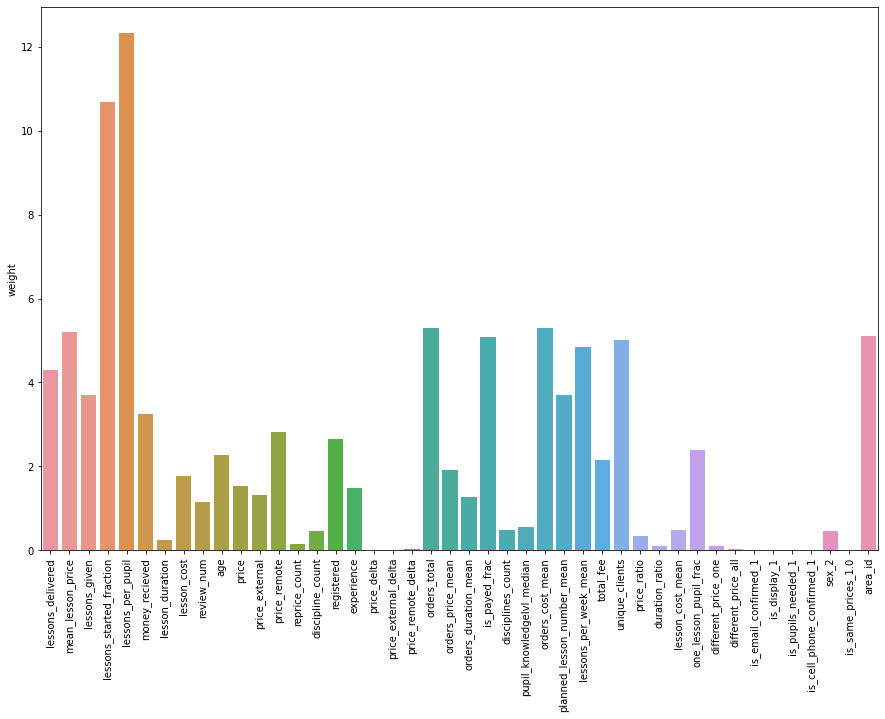

In [241]:
sns.barplot(
    y=features_imp.weight,
    x=features_imp.index
)
plt.xticks(rotation=90);

In [246]:
# Преобразуем трансформированные выборки в датасеты
X_train_transformed = pd.DataFrame(X_train_transformed, columns=features_imp.index)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=features_imp.index)

# Возьмем признаки с весом более 1
best_features = features_imp.query('weight > 1').index

# И сформируем экспериментальный датасет
X_train_exp = X_train_transformed[best_features]
X_test_exp = X_test_transformed[best_features]

categories_exp = [i for i in best_features if i in category_cols]

In [247]:
model_CB_exp = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_state=RS, 
    verbose=False,
    #cat_features=categories_exp
    )

model_CB_exp.fit(X_train_exp, y_train)

scores = cross_val_score(model_CB_exp, X_train_exp, y_train, scoring='f1')


print('Cross-validation score:', scores.mean())
print('Test score:', f1_score(y_test, model_CB_exp.predict(X_test_exp)))

Cross-validation score: 0.7086966386521065
Test score: 0.7085201793721974


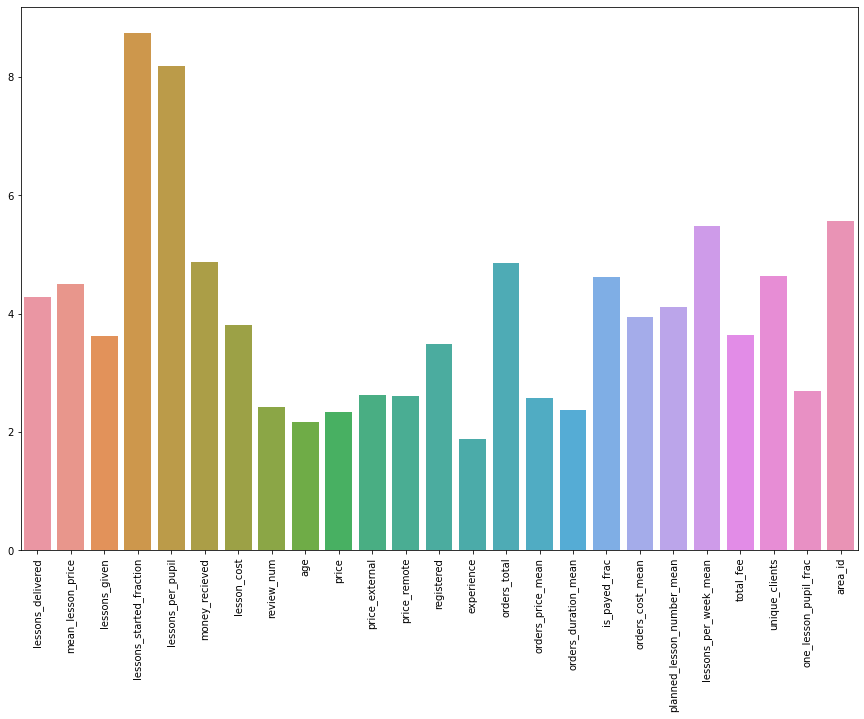

In [248]:
sns.barplot(
    y=model_CB_exp.get_feature_importance(),
    x=model_CB_exp.feature_names_
)
plt.xticks(rotation=90);

Отберем эффективные признаки

In [249]:
category_cols

['is_email_confirmed',
 'is_display',
 'is_pupils_needed',
 'is_cell_phone_confirmed',
 'sex',
 'is_same_prices',
 'area_id']

In [250]:
# Параметры для GridSearchCV
param_grid = {
    'iterations': [100, 400],
    'learning_rate': [0.001, 0.01],
    'depth': [4, 12]
}

# Создаем модель CatBoost
base_clf = CatBoostClassifier(random_seed=RS, logging_level='Silent', auto_class_weights='Balanced')

# Прямой отбор признаков
selected_features = []
best_f1_score = 0
best_clf = None

for i in tqdm(range(X_train.shape[1])):
    # Выбираем признак, который еще не был выбран
    remaining_features = [f for f in X_train.columns if f not in selected_features]
    
    # Добавляем один из оставшихся признаков к выбранным признакам
    selected_features.append(remaining_features[0])
    
    # Обучаем модель, используя только выбранные признаки
    grid_search = GridSearchCV(base_clf, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train[selected_features], y_train, cat_features=[i for i in selected_features if i in category_cols])
    
    # Получаем лучшую модель и ее результаты
    clf = grid_search.best_estimator_
    cv_f1_score = grid_search.best_score_
    
    # Предсказываем метки на тестовом наборе данных
    y_pred = clf.predict(X_test[selected_features])
    
    # Оцениваем F1-меру модели
    f1 = f1_score(y_test, y_pred)
    
    # Если F1-мера улучшилась, сохраняем выбранные признаки и лучшую модель
    if f1 > best_f1_score:
        best_f1_score = f1
        best_features = selected_features.copy()
        best_clf = clf



100%|██████████| 44/44 [1:56:31<00:00, 158.90s/it]


In [251]:
# Выводим F1-меру наилучшей модели
print("Наилучшая F1-мера:", best_f1_score)
print(f'Наилучшие признаки ({len(best_features)} шт.): {best_features}')
print("Лучшие гиперпараметры:", best_clf.get_params())

Наилучшая F1-мера: 0.7193675889328064
Наилучшие признаки (43 шт.): ['lessons_delivered', 'mean_lesson_price', 'lessons_given', 'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved', 'is_email_confirmed', 'lesson_duration', 'lesson_cost', 'is_display', 'is_pupils_needed', 'is_cell_phone_confirmed', 'area_id', 'sex', 'review_num', 'age', 'price', 'price_external', 'price_remote', 'reprice_count', 'discipline_count', 'registered', 'experience', 'price_delta', 'price_external_delta', 'price_remote_delta', 'orders_total', 'orders_price_mean', 'orders_duration_mean', 'is_payed_frac', 'disciplines_count', 'pupil_knowledgelvl_median', 'orders_cost_mean', 'planned_lesson_number_mean', 'lessons_per_week_mean', 'total_fee', 'unique_clients', 'is_same_prices', 'price_ratio', 'duration_ratio', 'lesson_cost_mean', 'one_lesson_pupil_frac', 'different_price_one']
Лучшие гиперпараметры: {'iterations': 100, 'learning_rate': 0.001, 'depth': 12, 'random_seed': 33564, 'logging_level': 'Silent',

Попробуем рекурсивный отбор признаков

In [252]:
def recursive_feature_elimination(model, X_train, y_train, X_test, y_test, selected_features=None):
    if selected_features is None:
        selected_features = list(X_train.columns)
    
    # Обучаем модель на всех признаках
    model.fit(X_train[selected_features], y_train, cat_features=[i for i in selected_features if i in category_cols])
    y_pred = model.predict(X_test[selected_features])
    best_f1 = f1_score(y_test, y_pred)
    best_features = selected_features.copy()
    
    # Рекурсивное исключение признаков
    for feature in tqdm(selected_features):
        new_features = selected_features.copy()
        new_features.remove(feature)
        
        # Обучаем модель на новом наборе признаков
        model.fit(X_train[new_features], y_train, cat_features=[i for i in new_features if i in category_cols])
        y_pred = model.predict(X_test[new_features])
        f1 = f1_score(y_test, y_pred)
        
        # Если F1-мера улучшилась, обновляем лучший набор признаков
        if f1 > best_f1:
            best_f1 = f1
            best_features = new_features
    
    return best_features, best_f1

# Создаем модель CatBoost
model = CatBoostClassifier(iterations=100, random_seed=RS, auto_class_weights='Balanced', logging_level='Silent')

# Задаем сетку гиперпараметров для поиска
param_grid = {
    'iterations': [100, 400],
    'learning_rate': [0.001, 0.01],
    'depth': [4, 12]
}

# Создаем экземпляр GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3)

# Вызываем функцию для рекурсивного отбора признаков с подбором гиперпараметров
best_features_rec, best_f1 = recursive_feature_elimination(grid_search, X_train, y_train, X_test, y_test)

100%|██████████| 44/44 [6:11:10<00:00, 506.15s/it]  


In [253]:
# Выводим результаты
print(f'Наилучшие признаки ({len(best_features_rec)} шт.): {best_features_rec}')
print('F1-мера на тестовом наборе данных с лучшими признаками:', best_f1)

Наилучшие признаки (43 шт.): ['lessons_delivered', 'mean_lesson_price', 'lessons_given', 'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved', 'is_email_confirmed', 'lesson_duration', 'lesson_cost', 'is_display', 'is_pupils_needed', 'is_cell_phone_confirmed', 'area_id', 'sex', 'review_num', 'age', 'price', 'price_external', 'price_remote', 'reprice_count', 'discipline_count', 'registered', 'experience', 'price_delta', 'price_external_delta', 'price_remote_delta', 'orders_total', 'orders_price_mean', 'orders_duration_mean', 'is_payed_frac', 'disciplines_count', 'pupil_knowledgelvl_median', 'orders_cost_mean', 'planned_lesson_number_mean', 'lessons_per_week_mean', 'total_fee', 'unique_clients', 'is_same_prices', 'price_ratio', 'duration_ratio', 'lesson_cost_mean', 'different_price_one', 'different_price_all']
F1-мера на тестовом наборе данных с лучшими признаками: 0.7295081967213115


In [272]:
# Обучаем модель CatBoostClassifier на обучающем наборе данных с использованием только отобранных признаков
best_model_rec = CatBoostClassifier(**grid_search.best_params_, random_seed=RS, logging_level='Silent')
best_model_rec.fit(X_train[best_features_rec], y_train, cat_features=[i for i in best_features_rec if i in category_cols])

# Оцениваем модель на тестовом наборе данных
y_pred = best_model_rec.predict(X_test[best_features_rec])
f1 = f1_score(y_test, y_pred)

# Выводим результаты
print(f'Наилучшие признаки ({len(best_features_rec)} шт.): {best_features_rec}')
print("F1-мера на тестовом наборе данных с лучшими признаками:", f1)

Наилучшие признаки (43 шт.): ['lessons_delivered', 'mean_lesson_price', 'lessons_given', 'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved', 'is_email_confirmed', 'lesson_duration', 'lesson_cost', 'is_display', 'is_pupils_needed', 'is_cell_phone_confirmed', 'area_id', 'sex', 'review_num', 'age', 'price', 'price_external', 'price_remote', 'reprice_count', 'discipline_count', 'registered', 'experience', 'price_delta', 'price_external_delta', 'price_remote_delta', 'orders_total', 'orders_price_mean', 'orders_duration_mean', 'is_payed_frac', 'disciplines_count', 'pupil_knowledgelvl_median', 'orders_cost_mean', 'planned_lesson_number_mean', 'lessons_per_week_mean', 'total_fee', 'unique_clients', 'is_same_prices', 'price_ratio', 'duration_ratio', 'lesson_cost_mean', 'different_price_one', 'different_price_all']
F1-мера на тестовом наборе данных с лучшими признаками: 0.6391752577319587


По итогу экспериментов лучше всех показл себя прямой отбор признаков со значением F1-меры 0.719.

In [282]:
# Сохраним модель
best_model = best_clf

best_model.save_model(fname='Models\cb_model', 
                      format="cbm", 
                      export_parameters=None, 
                      pool=None)

Подберем оптимальный порог.

In [275]:
# Найдем индексы ложноположительных и ложноотрицательных результатов
fp = (y_test == 0) & (best_model.predict_proba(X_test_exp)[:, 1] == 1)
fn = (y_test == 1) & (best_model.predict_proba(X_test_exp)[:, 1] == 0)


# Предсказание вероятностей для класса 1
probabilities_test_filtered = best_model.predict_proba(X_test_exp)[:, 1]

# Определяем новый порог
threshold = 0.5 

# Получаем новые предсказания на основе порога
predictions_with_new_threshold = (probabilities_test_filtered >= threshold).astype('int')

# Расчет F1-меры с новым порогом
f1_with_new_threshold = f1_score(y_test, predictions_with_new_threshold)

print(f'F1-мера на тестовом наборе с стандартным порогом: {f1_with_new_threshold}')


fpr, tpr, thresholds = roc_curve(y_test, probabilities_test_filtered)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Оптимальный порог: {optimal_threshold}')

# Предсказание вероятностей для класса 1
probabilities_test_filtered = best_model.predict_proba(X_test_exp)[:, 1]

# Определяем новый порог
threshold = optimal_threshold

# Получаем новые предсказания на основе порога
predictions_with_new_threshold = (probabilities_test_filtered >= threshold).astype('int')

# Расчет F1-меры с новым порогом
f1_with_new_threshold = f1_score(y_test, predictions_with_new_threshold)

print(f'F1-мера на тестовом наборе с новым порогом: {f1_with_new_threshold}')

F1-мера на тестовом наборе с стандартным порогом: 0.7193675889328064
Оптимальный порог: 0.5000110815653602
F1-мера на тестовом наборе с новым порогом: 0.7193675889328064


Порог не влияет на качество модели.

## Краткий вывод

Проведены эксперименты по улучшению модели. 

Оценена важность признаков методом прямого и рекурсивного отбора.  
Проведена попытка подобрать оптимальный порог, что не принесло результата.

Лучшая метрика F1-меры = 0.7295 получена при рекурсивном отборе признаков.  

Метрика на тестовом наборе данных составила 0.6391.

# Вывод

Представлены данные (5 таблиц из БД: данные по репетиторам, ученикам, урокам, заказам и статистика).  
Данные проверены на адекватность, предобработаны для обучения МЛ-моделей:
* обработаны пропуски в данных;
* приведены к корректному типу.

Подсчитаны дополнительные статистики по репетиторам и сгенерированы новые признаки, такие как:
* общее число заказов;
* дительность занятий;
* доля оплат и т.д.

Полученный датасет подготовлен для подачи в модели машинного обучения.  
Данные разбиты на обучающую и тестовую выборки в пропорции 4:1.  
ПРоведено кодирование и масштабирование признаков.

Обучены модели логистической регрессии, случайного леса и CatBoost.  
Моделям подобраны оптимальные гиперпараметры.

Лучший результат показала модель CatBoost с внешним кодирование признаков (F1-мера = 0.6960).

Проведены эксперименты по улучшению модели. 

Оценена важность признаков методом прямого и рекурсивного отбора.  
Проведена попытка подобрать оптимальный порог, что не принесло результата.

Лучшая метрика F1-меры = 0.7295 получена при рекурсивном отборе признаков.  

Метрика на тестовом наборе данных составила 0.6391. 